# Projeto de Ciências de Dados

## **Impacto das Redes Sociais na Saúde Mental**

As redes sociais, apesar de oferecerem diversos benefícios, também podem apresentar efeitos negativos na saúde mental dos usuários. Estudos recentes indicam que o uso excessivo das redes sociais pode estar associado a diversos transtornos, como ansiedade, depressão, baixa autoestima, problemas de sono e até mesmo vício.

Este projeto se propõe a contribuir para a compreensão mais profunda dos efeitos do uso excessivo das redes sociais na saúde mental, fornecendo dados empíricos que possibilitem a criação de intervenções eficazes para prevenir e mitigar tais efeitos.

Os objetivos especificos do projeto são:
> Identificar os principais impactos do uso excessivo das redes sociais na saúde mental dos indivíduos;

> Investigar as variáveis que moderam a relação entre o uso das redes sociais e a saúde mental;

> Desenvolver um modelo preditivo para identificar indivíduos em risco de desenvolver problemas de saúde mental devido ao uso excessivo das redes sociais.



## Analise de Dados



### Parte 1 



> Importação dos dados

In [1]:

import pandas as pd

dados = pd.read_excel('D:\Cosmo\Documentos\Ciencia_dados\Questionário de Pesquisa_ Impacto das Redes Sociais na Saúde Mental.xlsx')



In [2]:
dados.head()

,Id,Hora de início,Hora de conclusão,Email,Nome,"Antes de iniciarmos, gostaríamos de confirmar se você consente em utilizar suas respostas para fins de pesquisa",Quantos anos você tem?,Qual é o seu sexo?,Quais são suas principais ocupações? (Marque todas as opções que se aplicam a você),Você usa redes sociais?,...,Com que frequência você busca validação nas redes sociais?,Com que frequência você se sente deprimido ou desanimado?,"Em uma escala de 1 a 5, com que frequência você experimenta mudanças no seu interesse pelas atividades diárias? Isso inclui trabalho, hobbies, exercícios, interações sociais e tarefas domésticas","Com base na pergunta anterior, marque qual das seguintes opções melhor descreve o modo como o seu interesse muda:","Em uma escala de 1 a 5, com que frequência você tem problemas para dormir?",Você já tentou reduzir o tempo que passa no celular?,"Se sim, o que te motivou a tentar reduzir o tempo que passa no celular?",Quais medidas você tomou para reduzir o tempo que passa no celular? (Marque todas que se aplicam),"Em relação às medidas que você mencionou na pergunta anterior, qual foi o seu nível de sucesso em reduzir o tempo que passa no celular?",Quais foram os principais desafios que você enfrentou ao tentar reduzir o tempo que passa no celular?
0,2,2024-03-27 20:32:50,2024-03-27 20:37:19,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",34,Feminino,Empregado com carteira assinada;Dedicação excl...,Sim,...,Sempre,Frequentemente,3.0,Prazer: O quanto você se diverte ou se sente g...,4.0,Não,NaN,NaN,NaN,NaN
1,3,2024-03-27 20:35:50,2024-03-27 20:39:17,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",33,Feminino,Empregado com carteira assinada;Freelancer;,Sim,...,Às vezes,Às vezes,4.0,Prazer: O quanto você se diverte ou se sente g...,5.0,Não,NaN,NaN,NaN,NaN
2,4,2024-03-27 20:40:57,2024-03-27 20:52:42,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",19,Masculino,Dedicação exclusiva à família;,Sim,...,Raramente,Raramente,2.0,Prazer: O quanto você se diverte ou se sente g...,3.0,Não,NaN,NaN,NaN,NaN
3,5,2024-03-27 20:46:25,2024-03-27 20:58:37,anonymous,NaN,"Sim, eu consinto em utilizar minhas respostas ...",23,Masculino,Graduação;Empregado com carteira assinada;,Sim,...,Nunca,Raramente,2.0,Intensidade: O nível de entusiasmo ou motivaçã...,1.0,Sim,Motivos de produtividade,Desativar notificações;Limitar o tempo de uso;,Sucesso moderado,"O principal desafio, e foi o que fez eu desati..."
4,6,2024-03-27 21:02:30,2024-03-27 21:04:47,anônima,NaN,"Sim, eu consinto em utilizar minhas respostas ...",21,Feminino,Graduação,Sim,...,Raramente,Às vezes,3.0,Duração: A quantidade de tempo que você conseg...,2.0,Não,NaN,NaN,NaN,NaN




> Padronização dos Dados

In [3]:
dados.columns

Index(['Id', 'Hora de início', 'Hora de conclusão', 'Email', 'Nome',
       'Antes de iniciarmos, gostaríamos de confirmar se você consente em utilizar suas respostas para fins de pesquisa',
       'Quantos anos você tem?', 'Qual é o seu sexo?',
       'Quais são suas principais ocupações? (Marque todas as opções que se aplicam a você)',
       'Você usa redes sociais?',
       'Quais redes sociais você usa? (Marque todas que se aplicam)',
       'Quanto tempo você costuma passar nas redes sociais por dia?',
       'Com que frequência você usa as redes sociais sem um propósito específico?',
       'Com que frequência você se distrai com as redes sociais enquanto faz outras atividades?',
       'Você se sente ansioso se não usa as redes sociais por um tempo?',
       'Em uma escala de 1 a 5, quão fácil é para você se distrair?',
       'Em uma escala de 1 a 5, quanto você se preocupa com pensamentos negativos?',
       'Você acha difícil se concentrar nas suas atividades de trabalho/est

In [4]:
colunas = pd.Series(dados.columns)

colunas_resumidas = {
    'Id' : 'Id', 'Hora de início': 'Inicio', 'Hora de conclusão': 'Fim', 'Email': 'Email', 'Nome' : 'Nome',
       'Antes de iniciarmos, gostaríamos de confirmar se você consente em utilizar suas respostas para fins de pesquisa': 'Consentimento',
       'Quantos anos você tem?': 'Idade', 'Qual é o seu sexo?': 'Sexo',
       'Quais são suas principais ocupações? (Marque todas as opções que se aplicam a você)': 'Ocupações',
       'Você usa redes sociais?': 'UsaRedesSociais',
       'Quais redes sociais você usa? (Marque todas que se aplicam)': 'RedesSociais',
       'Quanto tempo você costuma passar nas redes sociais por dia?': 'TempoRedesSociais',
       'Com que frequência você usa as redes sociais sem um propósito específico?': 'FrequenciaUsoRedes',
       'Com que frequência você se distrai com as redes sociais enquanto faz outras atividades?': 'DistraçãoRedes',
       'Você se sente ansioso se não usa as redes sociais por um tempo?': 'AnsiedadeRedes',
       'Em uma escala de 1 a 5, quão fácil é para você se distrair?': 'FacilidadeDistração',
       'Em uma escala de 1 a 5, quanto você se preocupa com pensamentos negativos?': 'PreocupaçãoNegativa',
       'Você acha difícil se concentrar nas suas atividades de trabalho/estudo?': 'DificuldadeConcentração',
       'Quais tipos de contas você costuma seguir nas redes sociais? (Marque todas as que se aplicam)': 'ContasSeguidas',
       'Em uma escala de 1 a 5, com que frequência você se compara a outras pessoas de sucesso nas redes sociais?': 'ComparaçãoSucesso',
       'Como você geralmente se sente ao se comparar com outras pessoas nas redes sociais': 'SentimentoComparação' ,
       'Com que frequência você busca validação nas redes sociais?': 'BuscaValidação',
       'Com que frequência você se sente deprimido ou desanimado?': 'FrequenciaDepressão',
       'Em uma escala de 1 a 5, com que frequência você experimenta mudanças no seu interesse pelas atividades diárias?\xa0Isso inclui trabalho, hobbies, exercícios, interações sociais e tarefas domésticas': 'MudancaInteresse',
       'Com base na pergunta anterior,\xa0marque qual das seguintes opções melhor descreve o modo como o seu interesse muda:': 'DescriçãoMudançaInteresse',
       'Em uma escala de 1 a 5, com que frequência você tem problemas para dormir?': 'ProblemasSono',
       'Você já tentou reduzir o tempo que passa no celular?': 'TentativaReduçãoCelular',
       'Se sim, o que te motivou a tentar reduzir o tempo que passa no celular?': 'MotivaçãoRedução',
       'Quais medidas você tomou para reduzir o tempo que passa no celular?\xa0(Marque todas que se aplicam)': 'MedidasRedução',
       'Em relação às medidas que você mencionou na pergunta anterior, qual foi o seu nível de sucesso em reduzir o tempo que passa no celular?': 'SucessoRedução',
       'Quais foram os principais desafios que você enfrentou ao tentar reduzir o tempo que passa no celular?': 'DesafiosRedução'}


colunas = colunas.replace(colunas_resumidas)

dados.columns = colunas

In [5]:
dados.columns

Index(['Id', 'Inicio', 'Fim', 'Email', 'Nome', 'Consentimento', 'Idade',
       'Sexo', 'Ocupações', 'UsaRedesSociais', 'RedesSociais',
       'TempoRedesSociais', 'FrequenciaUsoRedes', 'DistraçãoRedes',
       'AnsiedadeRedes', 'FacilidadeDistração', 'PreocupaçãoNegativa',
       'DificuldadeConcentração', 'ContasSeguidas', 'ComparaçãoSucesso',
       'SentimentoComparação', 'BuscaValidação', 'FrequenciaDepressão',
       'MudancaInteresse', 'DescriçãoMudançaInteresse', 'ProblemasSono',
       'TentativaReduçãoCelular', 'MotivaçãoRedução', 'MedidasRedução',
       'SucessoRedução', 'DesafiosRedução'],
      dtype='object')

In [6]:
# Dicionario para a coluna 'Consetimento'

# Esse dicionario foi criado, após a analise da distribuição dos dados, onde se viu que seria 
# necessario para visualizar melhor os dados

dic_consentimento = {
    'Sim, eu consinto em utilizar minhas respostas para fins de pesquisa.': 'Sim',
    'Não, eu não consinto em utilizar minhas respostas para fins de pesquisa.': 'Não'
}

dados['Consentimento'] = dados['Consentimento'].map(dic_consentimento)
dados['Consentimento'].unique()

array(['Sim'], dtype=object)

In [7]:
# Dicionario para a coluna 'DescriçãoMundaçaInteresse'

# Esse dicionario foi criado, após a analise da distribuição dos dados, onde se viu que seria 
# necessario para visualizar melhor os dados

dic_descricao_mudanca_interesse = {
    'Intensidade: O nível de entusiasmo ou motivação que você sente pela atividade.': 'Intensidade',
    'Duração: A quantidade de tempo que você consegue se concentrar ou se dedicar à atividade.': 'Duração',
    'Prazer: O quanto você se diverte ou se sente gratificado ao realizar a atividade.': 'Prazer'
}

dados['DescriçãoMudançaInteresse'] = dados['DescriçãoMudançaInteresse'].map(dic_descricao_mudanca_interesse)
dados['DescriçãoMudançaInteresse'].unique()

array(['Prazer', 'Intensidade', 'Duração', nan], dtype=object)

In [8]:
# Dicionario para a coluna 'MotivaçãoRedução'

# Esse dicionario foi criado, após a analise da distribuição dos dados, onde se viu que seria 
# necessario para visualizar melhor os dados

dic_motivacao_reducao = {
    'Motivos de produtividade': 'produtividade', 
    'Motivos de viver a vida real': 'viver_vida_real',
    'Motivos de saúde': 'saude',
    'A consciência sobre os malefícios do uso em excesso ': 'maleficios',
    'Motivos de relacionamento': 'relacionamento',
    'Por estar sempre vendo algo que no momento não consigo atingir! ': 'atingir_metas'
    }

dados['MotivaçãoRedução'] = dados['MotivaçãoRedução'].map(dic_motivacao_reducao)
dados['MotivaçãoRedução'].unique()

array([nan, 'produtividade', 'viver_vida_real', 'saude', 'maleficios',
       'relacionamento', 'atingir_metas'], dtype=object)

In [9]:
ocupacoes_dummies = dados['Ocupações'].str.get_dummies(sep=';')
ocupacoes_dummies.columns = ocupacoes_dummies.columns.str.strip().str.replace(' ', '_')

redes_sociais_dummies = dados['RedesSociais'].str.get_dummies(sep=';')
redes_sociais_dummies.columns = redes_sociais_dummies.columns.str.strip().str.replace(' ', '_')

contas_seguidas_dummies = dados['ContasSeguidas'].str.get_dummies(sep=';')
contas_seguidas_dummies.columns = contas_seguidas_dummies.columns.str.strip().str.replace(' ', '_')

medidas_reducao_dummies = dados['MedidasRedução'].str.get_dummies(sep=';')
medidas_reducao_dummies.columns = medidas_reducao_dummies.columns.str.strip().str.replace(' ', '_')


In [10]:
ocupacoes_dummies.head()


,Aposentada_recentemente,Bolsista,Dedicação_exclusiva_à_família,Doutorado,Empreendedor,Empregado_com_carteira_assinada,Estagiário,Estudante,Freelancer,Graduação,Mestrado,Pós-graduação,Voluntário
0,0,0,1,0,0,1,0,1,0,0,0,0,0
1,0,0,0,0,0,1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,1,0,0,0


In [11]:
redes_sociais_dummies.head()

,Facebook,Instagram,Snapchat,TikTok,Twitter,WhatsApp,YouTube
0,1,1,0,1,0,1,0
1,1,1,0,1,0,1,1
2,1,1,0,0,0,1,1
3,1,1,0,0,0,1,1
4,0,1,0,1,0,1,0


In [12]:
contas_seguidas_dummies.head()

,Contas_de_celebridades_e_influenciadores,Contas_de_esportes,"Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_viagens,_etc.)",Contas_de_humor_e_memes,Contas_de_marcas_e_empresas,Contas_de_notícias_e_política,Contas_pessoais_de_amigos_e_familiares,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho
0,1,0,1,1,0,1,0,0,0,0
1,1,0,0,1,0,0,1,0,0,0
2,0,1,0,1,0,0,0,0,0,0
3,0,0,1,1,1,1,1,0,0,0
4,0,0,1,0,1,1,1,0,0,0


In [13]:
medidas_reducao_dummies.head()

,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,1,0,1,0
4,0,0,0,0,0


In [14]:
dados = pd.concat([dados, ocupacoes_dummies, redes_sociais_dummies, contas_seguidas_dummies, medidas_reducao_dummies], axis=1)

In [15]:
dados.head()

,Id,Inicio,Fim,Email,Nome,Consentimento,Idade,Sexo,Ocupações,UsaRedesSociais,...,Contas_de_notícias_e_política,Contas_pessoais_de_amigos_e_familiares,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
0,2,2024-03-27 20:32:50,2024-03-27 20:37:19,anonymous,NaN,Sim,34,Feminino,Empregado com carteira assinada;Dedicação excl...,Sim,...,1,0,0,0,0,0,0,0,0,0
1,3,2024-03-27 20:35:50,2024-03-27 20:39:17,anonymous,NaN,Sim,33,Feminino,Empregado com carteira assinada;Freelancer;,Sim,...,0,1,0,0,0,0,0,0,0,0
2,4,2024-03-27 20:40:57,2024-03-27 20:52:42,anonymous,NaN,Sim,19,Masculino,Dedicação exclusiva à família;,Sim,...,0,0,0,0,0,0,0,0,0,0
3,5,2024-03-27 20:46:25,2024-03-27 20:58:37,anonymous,NaN,Sim,23,Masculino,Graduação;Empregado com carteira assinada;,Sim,...,1,1,0,0,0,0,1,0,1,0
4,6,2024-03-27 21:02:30,2024-03-27 21:04:47,anônima,NaN,Sim,21,Feminino,Graduação,Sim,...,1,1,0,0,0,0,0,0,0,0


In [16]:
# Remoção das colunas que passaram pelo processo de get_dummies() e sprit()
colunas_remover_get_dummies = ['Ocupações', 'RedesSociais', 'ContasSeguidas', 'MedidasRedução']


# Após a analise da quantidade de nulos presentes na nossa base de dados. Foi observado que,
# como nossa base vem de uma pesquisa anonima, algumas colunas como `nome` sempre terá valores nulos.
colunas_remover_nulas= ['Fim', 'Email', 'Nome']

dados = dados.drop(columns=colunas_remover_get_dummies)
dados = dados.drop(columns=colunas_remover_nulas)

In [17]:
dados.columns

Index(['Id', 'Inicio', 'Consentimento', 'Idade', 'Sexo', 'UsaRedesSociais',
       'TempoRedesSociais', 'FrequenciaUsoRedes', 'DistraçãoRedes',
       'AnsiedadeRedes', 'FacilidadeDistração', 'PreocupaçãoNegativa',
       'DificuldadeConcentração', 'ComparaçãoSucesso', 'SentimentoComparação',
       'BuscaValidação', 'FrequenciaDepressão', 'MudancaInteresse',
       'DescriçãoMudançaInteresse', 'ProblemasSono', 'TentativaReduçãoCelular',
       'MotivaçãoRedução', 'SucessoRedução', 'DesafiosRedução',
       'Aposentada_recentemente', 'Bolsista', 'Dedicação_exclusiva_à_família',
       'Doutorado', 'Empreendedor', 'Empregado_com_carteira_assinada',
       'Estagiário', 'Estudante', 'Freelancer', 'Graduação', 'Mestrado',
       'Pós-graduação', 'Voluntário', 'Facebook', 'Instagram', 'Snapchat',
       'TikTok', 'Twitter', 'WhatsApp', 'YouTube',
       'Contas_de_celebridades_e_influenciadores', 'Contas_de_esportes',
       'Contas_de_hobbies_e_interesses_específicos_(música,_culinária,_v

### Parte 2

#### Separação de dados para Validação

Separar dados para validação antes de qualquer análise é crucial para garantir a confiabilidade e generalização de modelos. Essa prática previne problemas como sobreajuste e auxilia na detecção de vazamento de dados, promovendo análises mais precisas e resultados robustos

Dado a natureza do projeto, nosso objetivo é identificar valores ou padrões que justificam certos comportamentos ou respondem a perguntas, como por exemplo, alguém que passa muitas horas nas redes sociais tendem a ter níveis de ansiedade elevadas?

Por esse motivo, nossas variáveis Targets serão as colunas `AnsiedadeRedes`, `PreocupaçãoNegativa` e `FrequenciaDepressão`, tendo como principal feature `FrequenciaDepressão`.

In [18]:
dados.head()

,Id,Inicio,Consentimento,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,AnsiedadeRedes,...,Contas_de_notícias_e_política,Contas_pessoais_de_amigos_e_familiares,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
0,2,2024-03-27 20:32:50,Sim,34,Feminino,Sim,Mais de 5 horas,Frequentemente,Frequentemente,Frequentemente,...,1,0,0,0,0,0,0,0,0,0
1,3,2024-03-27 20:35:50,Sim,33,Feminino,Sim,Mais de 5 horas,Sempre,Às vezes,Às vezes,...,0,1,0,0,0,0,0,0,0,0
2,4,2024-03-27 20:40:57,Sim,19,Masculino,Sim,1-2 horas,Às vezes,Às vezes,Às vezes,...,0,0,0,0,0,0,0,0,0,0
3,5,2024-03-27 20:46:25,Sim,23,Masculino,Sim,3-4 horas,Frequentemente,Frequentemente,Nunca,...,1,1,0,0,0,0,1,0,1,0
4,6,2024-03-27 21:02:30,Sim,21,Feminino,Sim,Mais de 5 horas,Frequentemente,Sempre,Frequentemente,...,1,1,0,0,0,0,0,0,0,0


In [19]:
from sklearn.model_selection import train_test_split

# Ansiedade, Preocupação e Depressão como variáveis alvo
targets = ["AnsiedadeRedes", "PreocupaçãoNegativa", "FrequenciaDepressão"]

# Separação 80/20 com random_state fixo
dados_featutes = dados.drop(targets, axis=1)  # Features
dados_targets= dados[targets]  # Target variables

dados_featutes_train, dados_featutes_test, dados_targets_train, dados_targets_test = train_test_split(dados_featutes, dados_targets, test_size=0.2, shuffle=True, random_state=42)



In [20]:
print(dados_featutes_train.shape)
print(dados_featutes_test.shape)
print(dados_targets_train.shape)
print(dados_targets_test.shape)

(32, 56)
(9, 56)
(32, 3)
(9, 3)


In [21]:
dados_featutes_train.head()

,Id,Inicio,Consentimento,Idade,Sexo,UsaRedesSociais,TempoRedesSociais,FrequenciaUsoRedes,DistraçãoRedes,FacilidadeDistração,...,Contas_de_notícias_e_política,Contas_pessoais_de_amigos_e_familiares,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
6,8,2024-03-27 21:02:01,Sim,21,Masculino,Sim,3-4 horas,Frequentemente,Raramente,4.0,...,1,1,0,0,0,0,1,1,0,0
26,28,2024-03-28 17:05:31,Sim,42,Feminino,Sim,1-2 horas,Frequentemente,Frequentemente,4.0,...,0,1,0,0,0,0,0,0,0,0
12,14,2024-03-27 23:44:19,Sim,23,Feminino,Sim,2-3 horas,Às vezes,Frequentemente,5.0,...,1,1,0,0,0,0,1,1,1,1
17,19,2024-03-28 10:55:57,Sim,25,Masculino,Sim,Mais de 5 horas,Sempre,Sempre,5.0,...,1,1,0,0,0,0,0,0,0,0
9,11,2024-03-27 22:11:51,Sim,17,Masculino,Sim,1-2 horas,Às vezes,Raramente,4.0,...,0,1,0,0,0,0,0,0,1,0


In [22]:
dados_targets_train.head()

,AnsiedadeRedes,PreocupaçãoNegativa,FrequenciaDepressão
6,Raramente,4.0,Às vezes
26,Raramente,4.0,Às vezes
12,Raramente,3.0,Às vezes
17,Nunca,5.0,Sempre
9,Nunca,5.0,Frequentemente


In [23]:
dados_featutes_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 6 to 38
Data columns (total 56 columns):
 #   Column                                                                         Non-Null Count  Dtype         
---  ------                                                                         --------------  -----         
 0   Id                                                                             32 non-null     int64         
 1   Inicio                                                                         32 non-null     datetime64[ns]
 2   Consentimento                                                                  32 non-null     object        
 3   Idade                                                                          32 non-null     int64         
 4   Sexo                                                                           32 non-null     object        
 5   UsaRedesSociais                                                                32 non-null  

In [24]:
dados_targets_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32 entries, 6 to 38
Data columns (total 3 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   AnsiedadeRedes       31 non-null     object 
 1   PreocupaçãoNegativa  31 non-null     float64
 2   FrequenciaDepressão  31 non-null     object 
dtypes: float64(1), object(2)
memory usage: 1.0+ KB


In [25]:
dados_featutes_train.describe()

,Id,Inicio,Idade,FacilidadeDistração,ComparaçãoSucesso,MudancaInteresse,ProblemasSono,Aposentada_recentemente,Bolsista,Dedicação_exclusiva_à_família,...,Contas_de_notícias_e_política,Contas_pessoais_de_amigos_e_familiares,"Jogos,_séries,_filmes",Pesquisas,sobre_trabalho,Buscar_ajuda_profissional,Desativar_notificações,Desinstalar_aplicativos,Limitar_o_tempo_de_uso,Usar_aplicativos_de_controle_de_tela
count,32.000000,32,32.000000,31.000000,31.000000,31.000000,31.000000,32.000000,32.000000,32.000000,...,32.000000,32.000000,32.0,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000
mean,21.343750,2024-03-29 12:51:25.531249920,28.187500,3.290323,2.612903,2.741935,2.709677,0.031250,0.062500,0.093750,...,0.406250,0.875000,0.0,0.031250,0.031250,0.062500,0.406250,0.281250,0.406250,0.093750
min,2.000000,2024-03-27 20:32:50,16.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,11.750000,2024-03-27 21:57:33.500000,19.000000,2.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,21.000000,2024-03-28 11:48:28,25.500000,3.000000,2.000000,2.000000,3.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,32.250000,2024-03-28 21:04:37.500000,32.250000,4.500000,4.000000,3.000000,3.000000,0.000000,0.000000,0.000000,...,1.000000,1.000000,0.0,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000
max,40.000000,2024-04-05 10:15:43,59.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
std,11.904484,NaN,11.377503,1.395076,1.406590,1.094463,1.243478,0.176777,0.245935,0.296145,...,0.498991,0.336011,0.0,0.176777,0.176777,0.245935,0.498991,0.456803,0.498991,0.296145


In [26]:
dados_targets_train.describe()

,PreocupaçãoNegativa
count,31.000000
mean,3.387097
std,1.453213
min,1.000000
25%,2.000000
50%,4.000000
75%,5.000000
max,5.000000


## Visualização de dados

**Matplotlib** é uma biblioteca de visualização de dados amplamente utilizada, oferecendo uma gama versátil de gráficos, desde simples gráficos de linha até complexos mapas de calor. Com uma sintaxe flexível, os usuários podem personalizar cada aspecto de seus gráficos, desde cores e linhas até títulos e legendas. A facilidade de integração com outras bibliotecas Python a torna uma escolha popular entre cientistas de dados e analistas.

**Seaborn** é uma extensão estilizada de Matplotlib, projetada para simplificar a criação de gráficos estatísticos complexos. Com poucas linhas de código, é possível gerar visualizações atraentes que ressaltam automaticamente padrões nos dados. Seaborn também oferece paletas de cores atraentes e funcionalidades específicas para lidar com conjuntos de dados estatísticos.

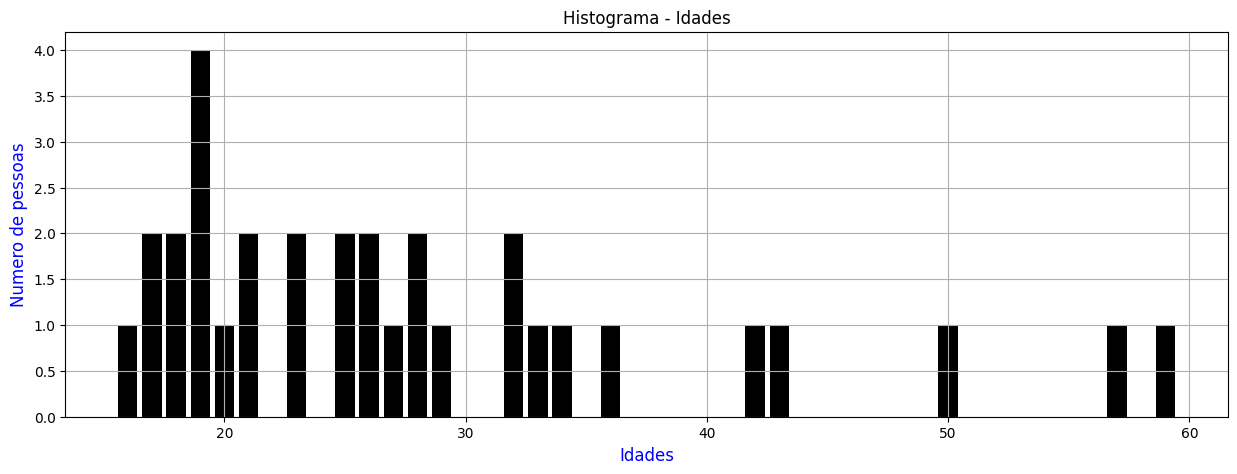

In [27]:
import matplotlib.pyplot as plt

eixo_X_features = dados_featutes_train.Idade.value_counts().sort_index().index
eixo_Y_features = dados_featutes_train.Idade.value_counts().sort_index().values

plt.figure(figsize=(15,5))

plt.bar(eixo_X_features, eixo_Y_features, color='Black')
plt.title('Histograma - Idades', fontsize=12)
plt.xlabel("Idades", fontsize = 12, color='blue')
plt.ylabel("Numero de pessoas", fontsize= 12, color='blue')
plt.grid()


## Análise Exploratória de Dados (EDA)

### Análise Univariada

> **Variável Target**

... a principal feature (coluna) ou resultado que um modelo de machine learning tenta prever ou explicar.

No nosso caso:

`AnsiedadeRedes`, `PreocupaçãoNegativa` e `FrequenciaDepressão`

#### `AnsiedadeRedes`

In [28]:
dados_targets_train.AnsiedadeRedes.value_counts(normalize=True)

AnsiedadeRedes
Às vezes          0.483871
Raramente         0.193548
Nunca             0.193548
Sempre            0.064516
Frequentemente    0.064516
Name: proportion, dtype: float64

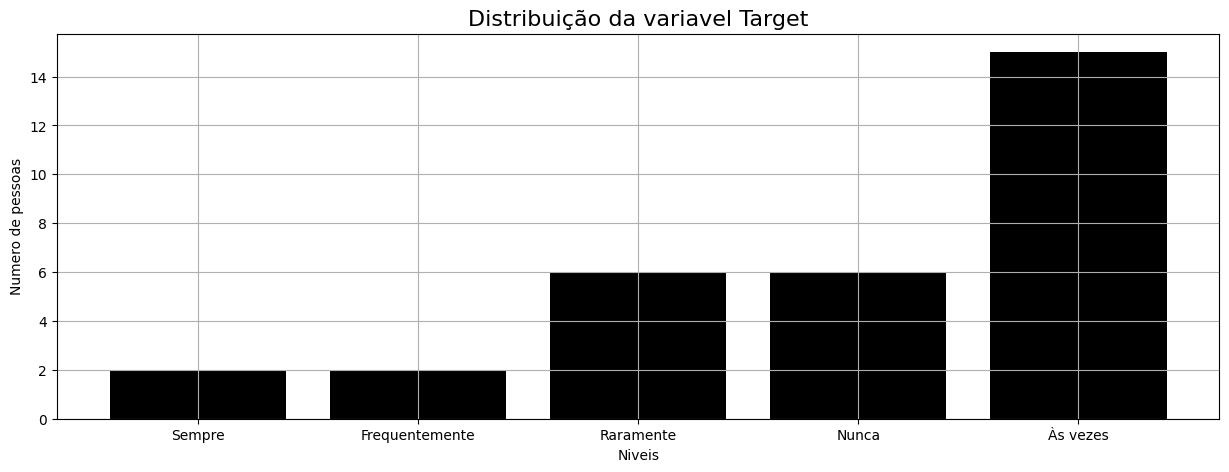

In [29]:
eixo_x = dados_targets_train.AnsiedadeRedes.value_counts().sort_values().index
eixo_y = dados_targets_train.AnsiedadeRedes.value_counts().sort_values().values

plt.figure(figsize=(15,5))

plt.bar(eixo_x, eixo_y, color='Black')
plt.title('Distribuição da variavel Target', fontsize=16)
plt.xlabel('Niveis')
plt.ylabel('Numero de pessoas')
plt.grid()

#### `PreocupaçãoNegativa`

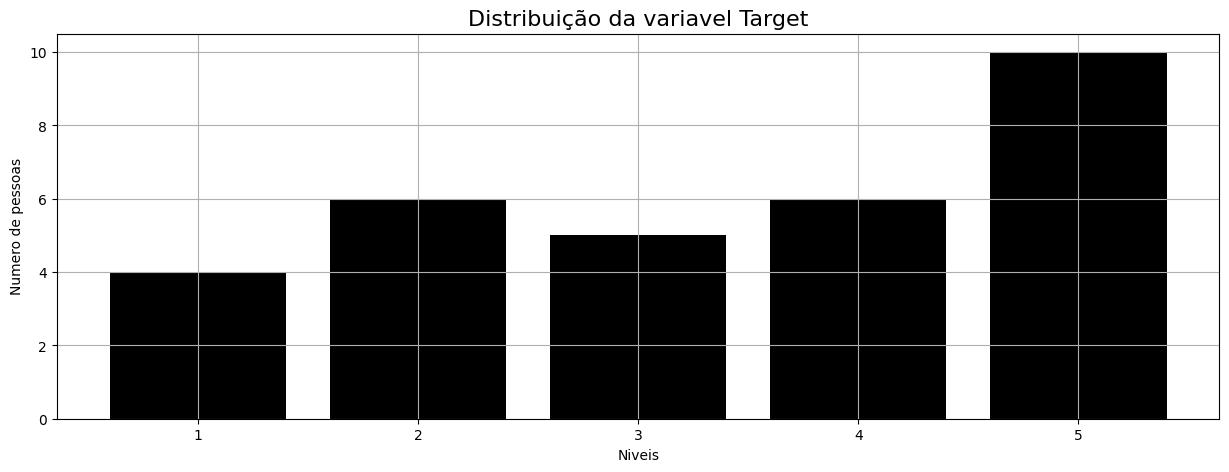

In [30]:
eixo_x = dados_targets_train.PreocupaçãoNegativa.value_counts().sort_values().index
eixo_y = dados_targets_train.PreocupaçãoNegativa.value_counts().sort_values().values

plt.figure(figsize=(15,5))

plt.bar(eixo_x, eixo_y, color='Black')
plt.title('Distribuição da variavel Target', fontsize=16)
plt.xlabel('Niveis')
plt.ylabel('Numero de pessoas')
plt.grid()

#### `FrequenciaDepressão`

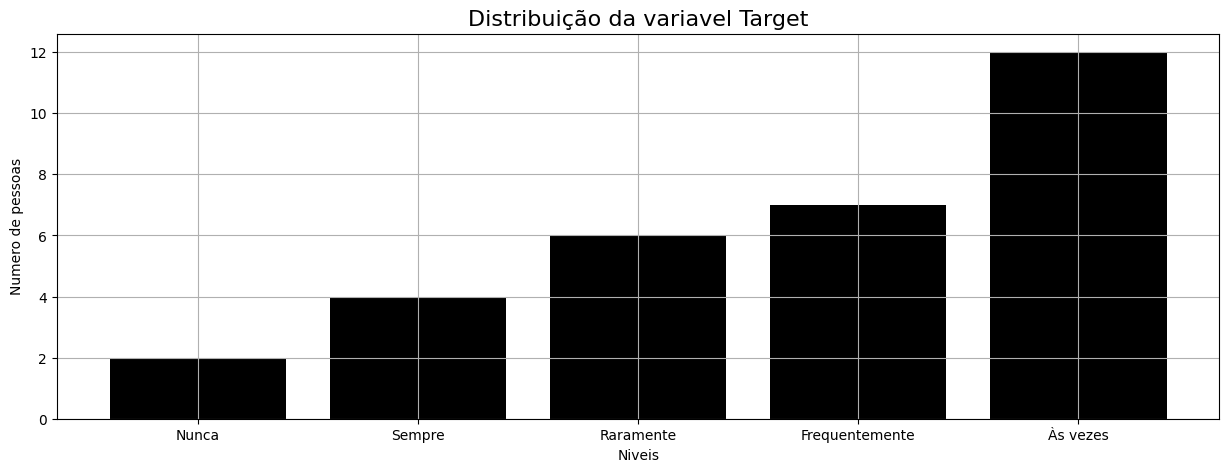

In [31]:
eixo_x = dados_targets_train.FrequenciaDepressão.value_counts().sort_values().index
eixo_y = dados_targets_train.FrequenciaDepressão.value_counts().sort_values().values

plt.figure(figsize=(15,5))

plt.bar(eixo_x, eixo_y, color='Black')
plt.title('Distribuição da variavel Target', fontsize=16)
plt.xlabel('Niveis')
plt.ylabel('Numero de pessoas')
plt.grid()

> **Distribuição dos Dados**

In [32]:
import seaborn as sns

#função para plotar detalhadamente cada coluna
def plot_distribuicao(dados):
    plt.figure(figsize=(12,4))
    sns.histplot(dados, kde=True)
    plt.show()

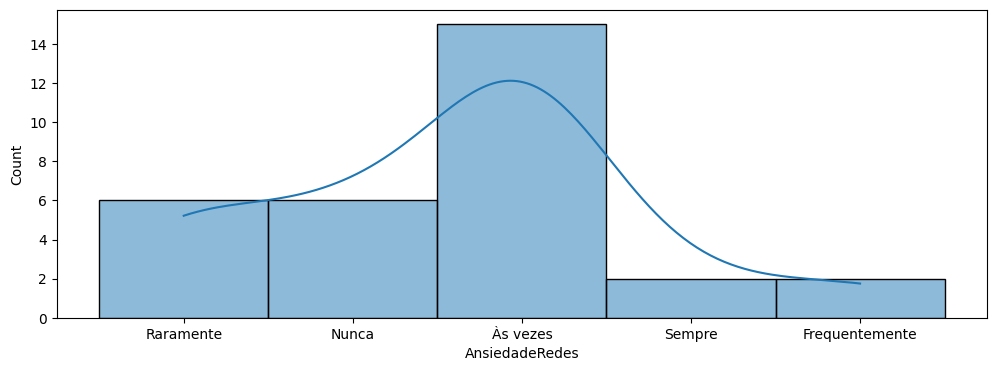

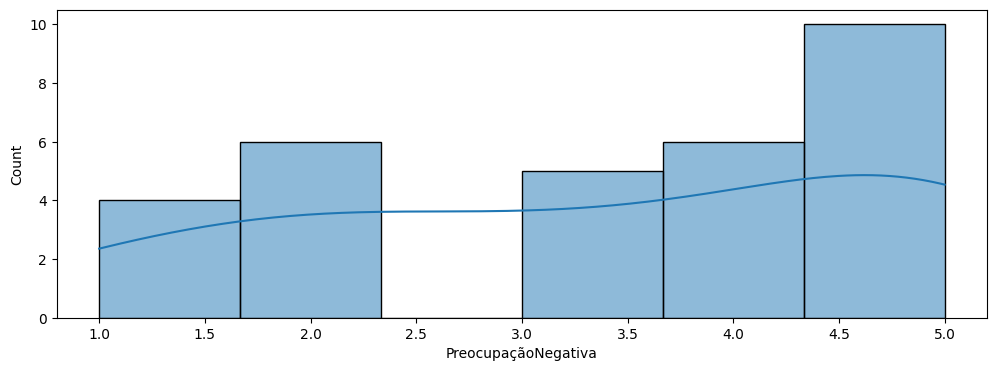

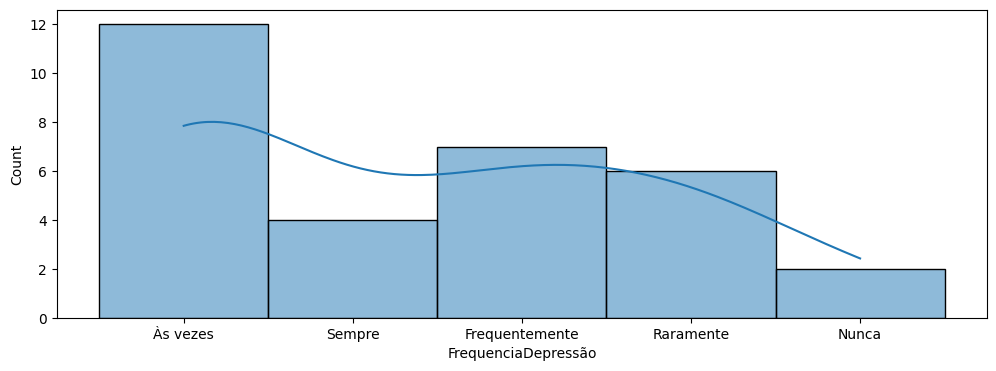

In [33]:
for coluna in dados_targets_train.columns:
    plot_distribuicao(dados_targets_train[coluna])

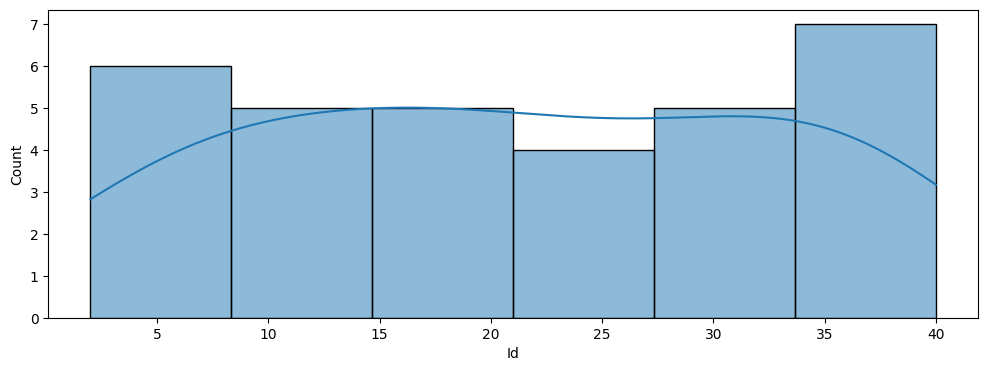

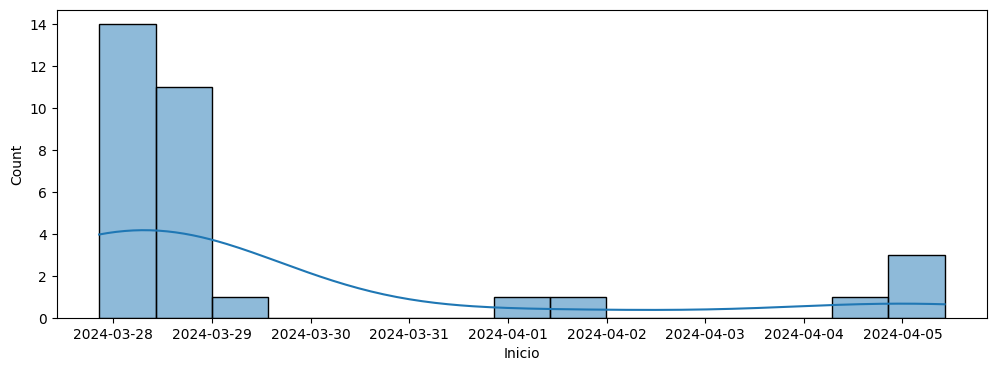

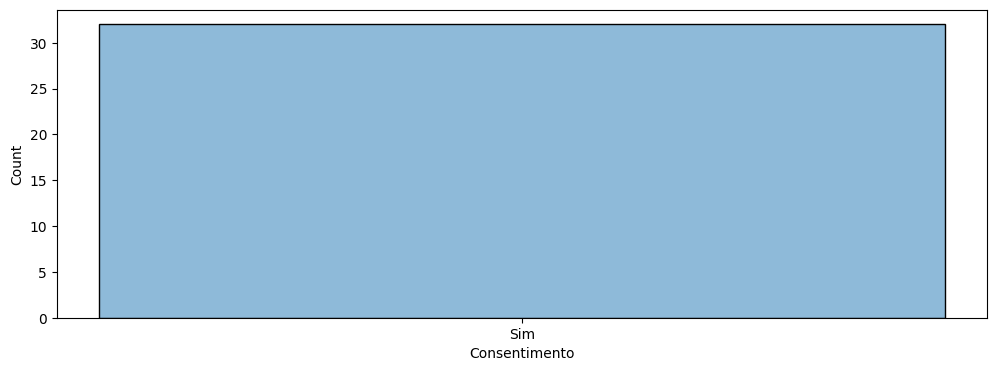

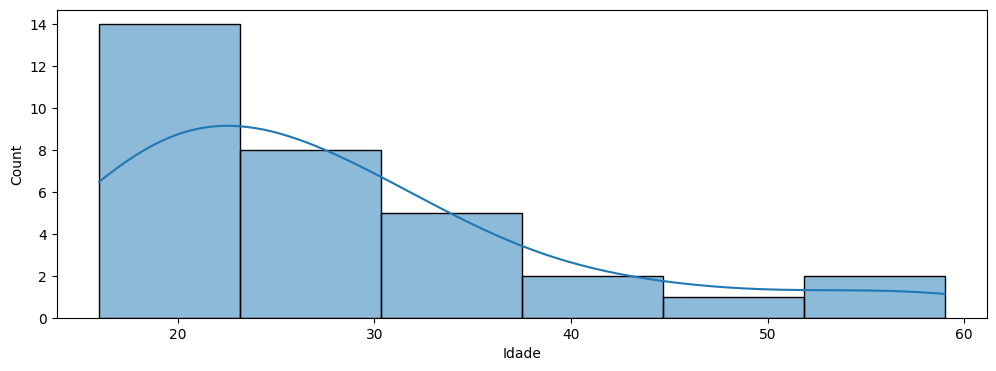

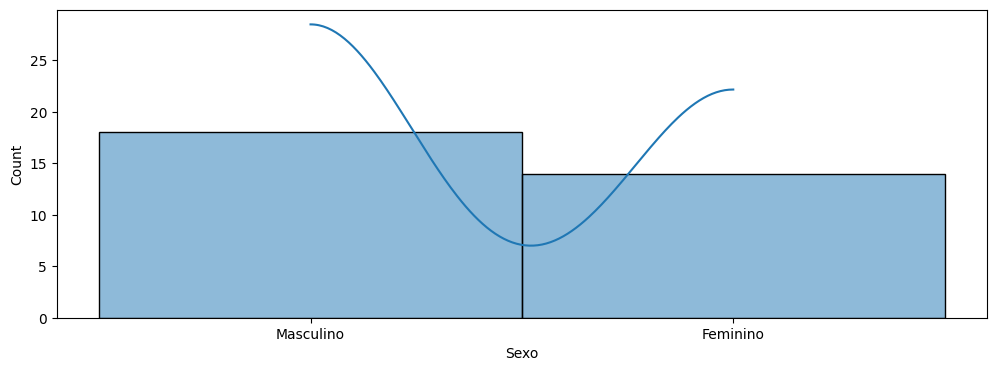

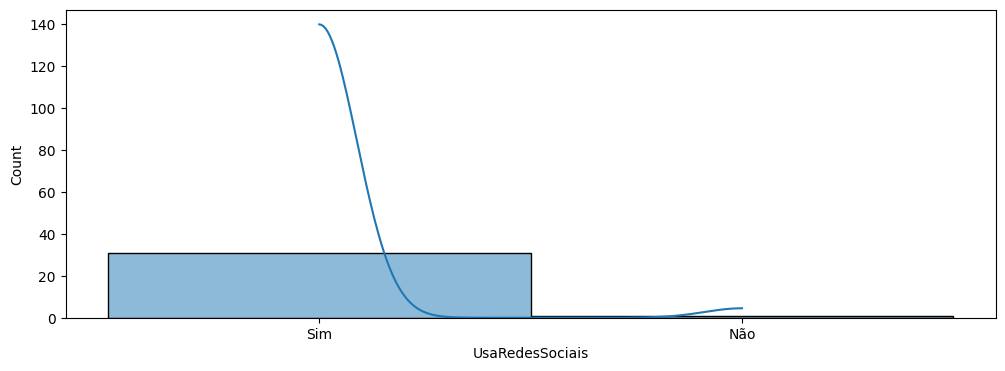

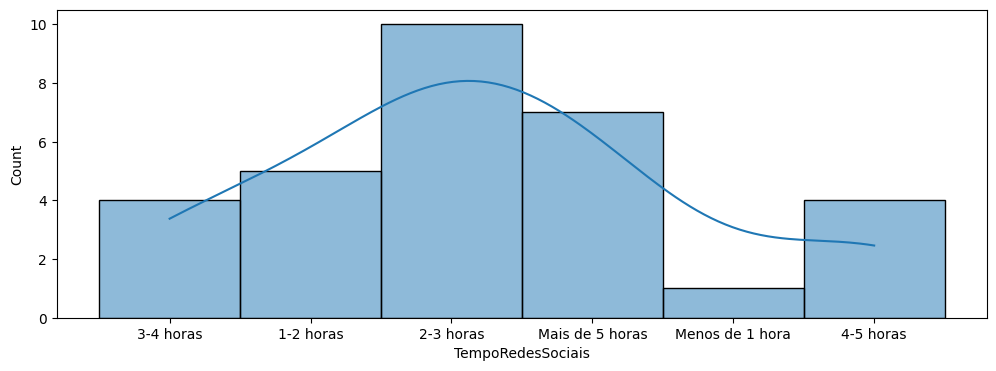

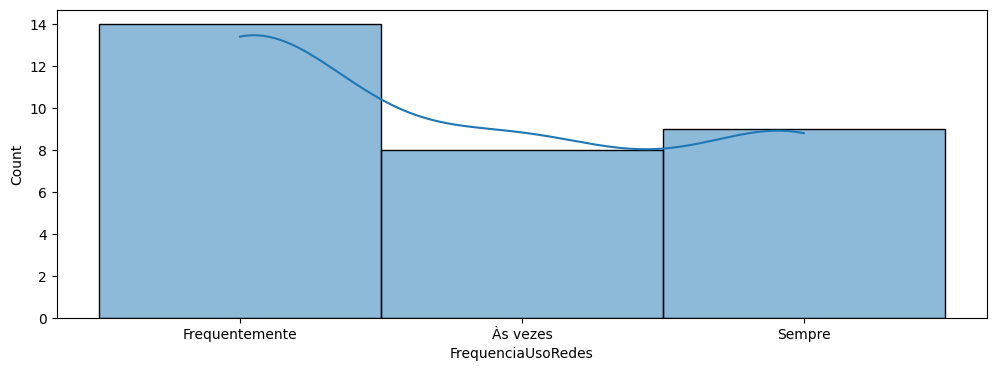

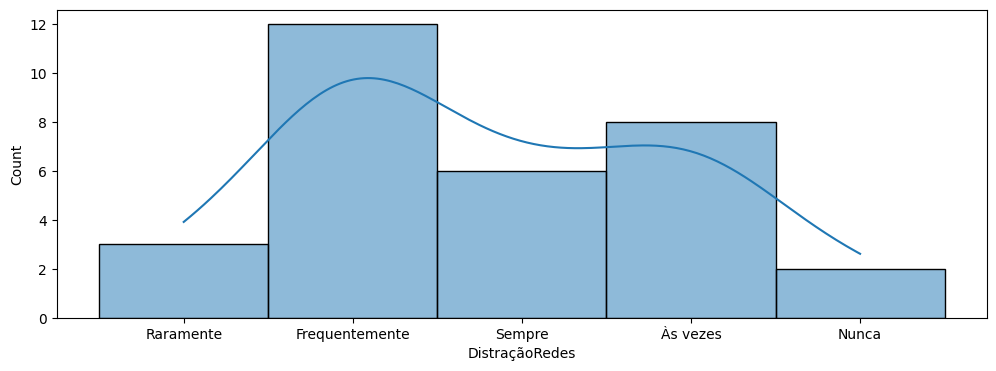

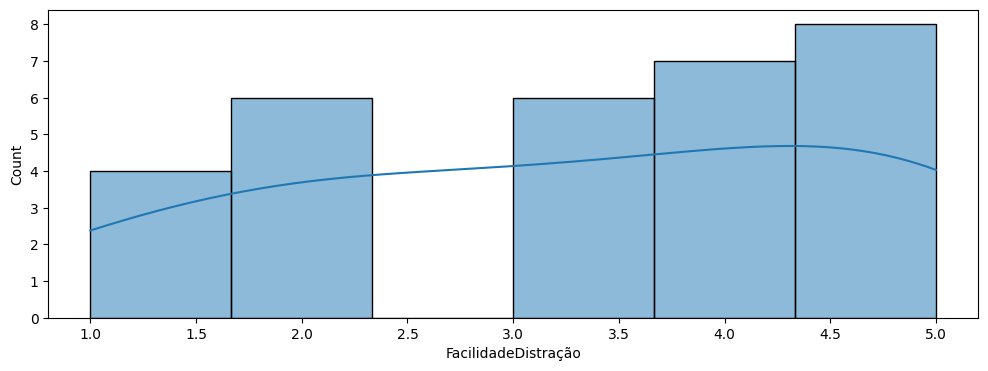

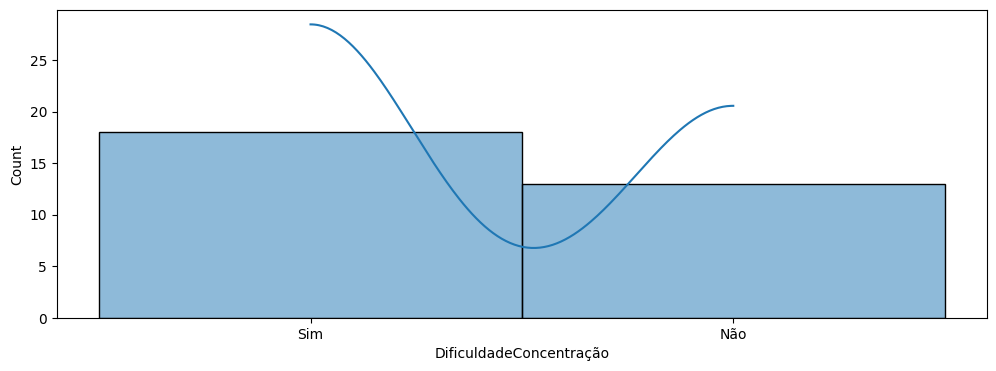

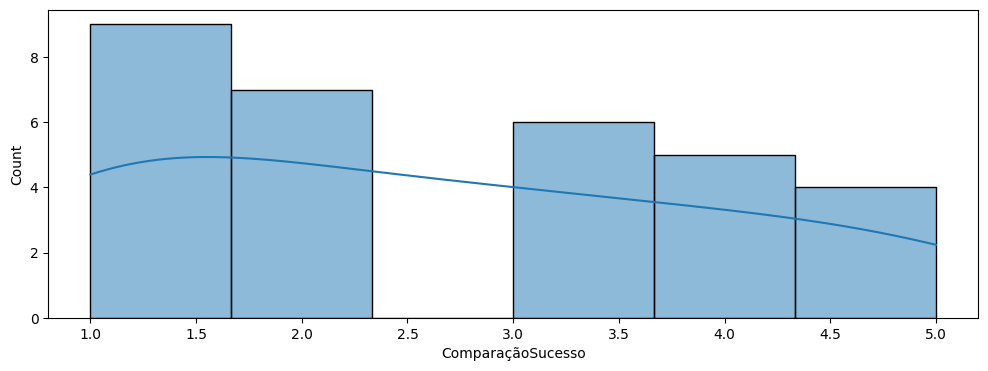

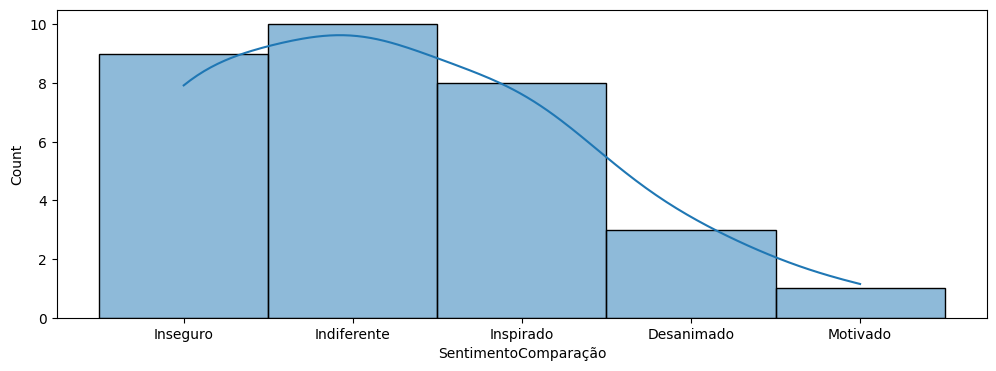

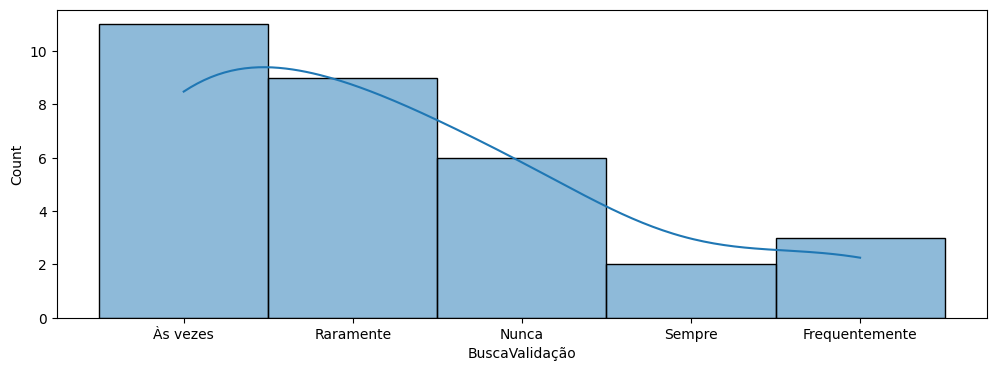

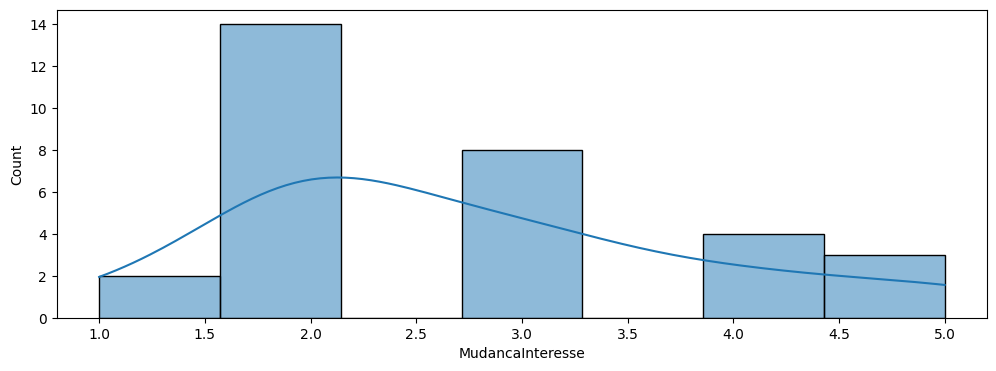

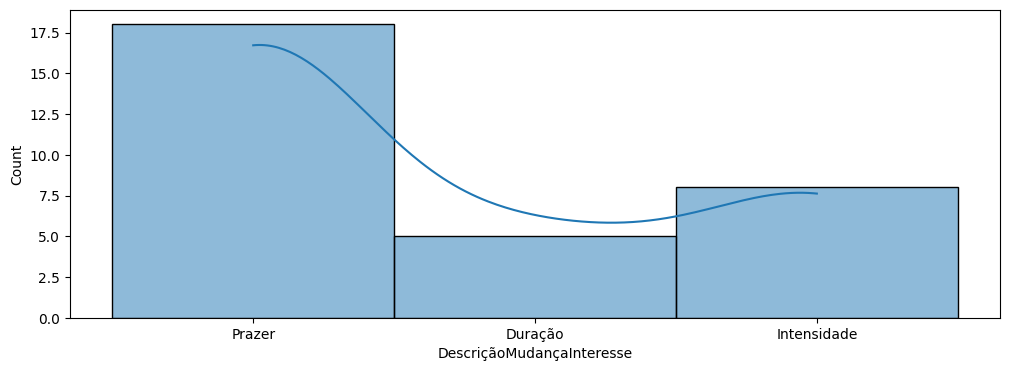

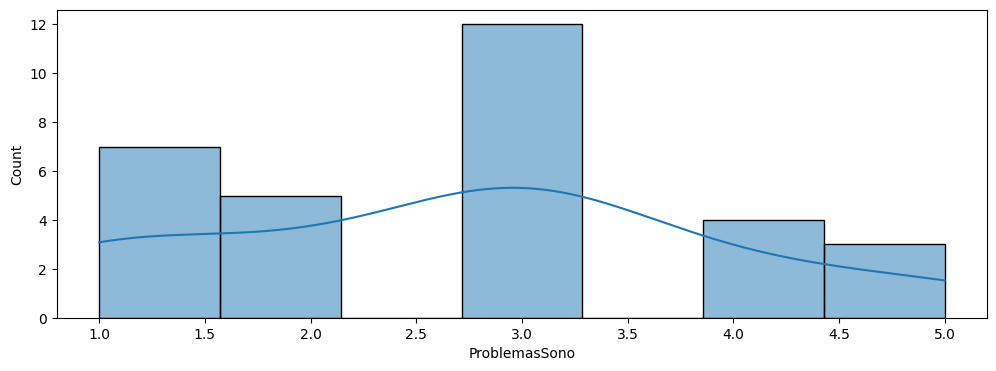

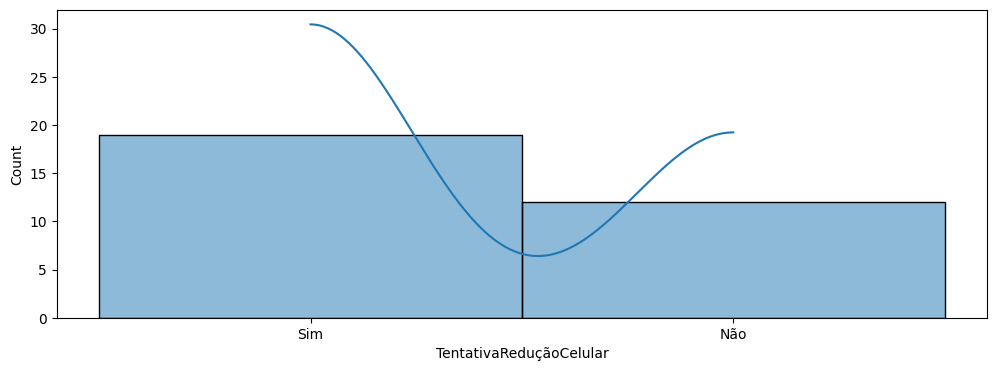

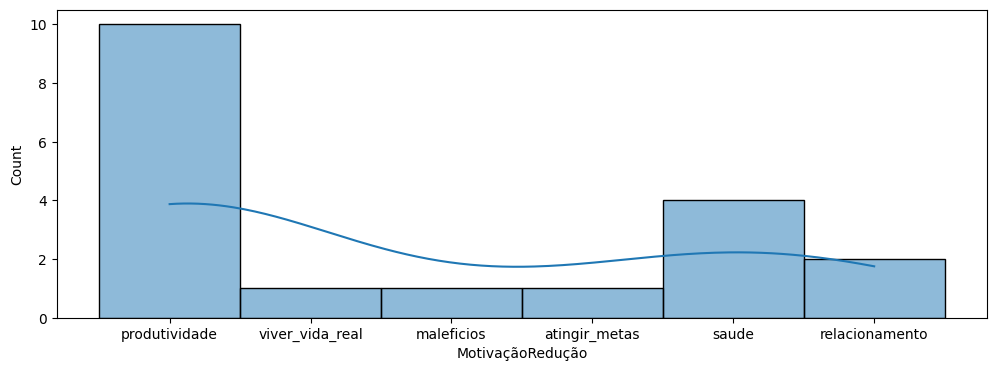

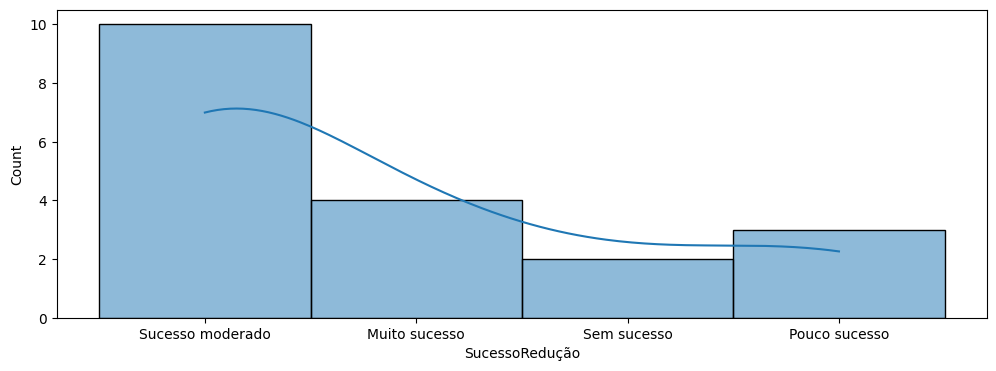

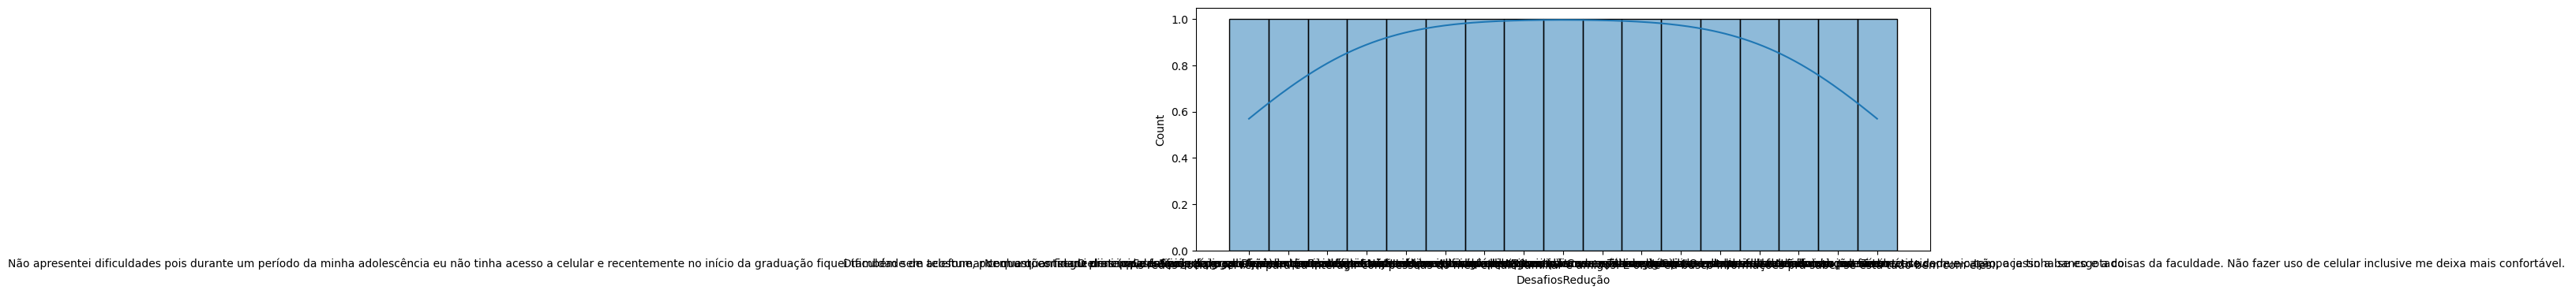

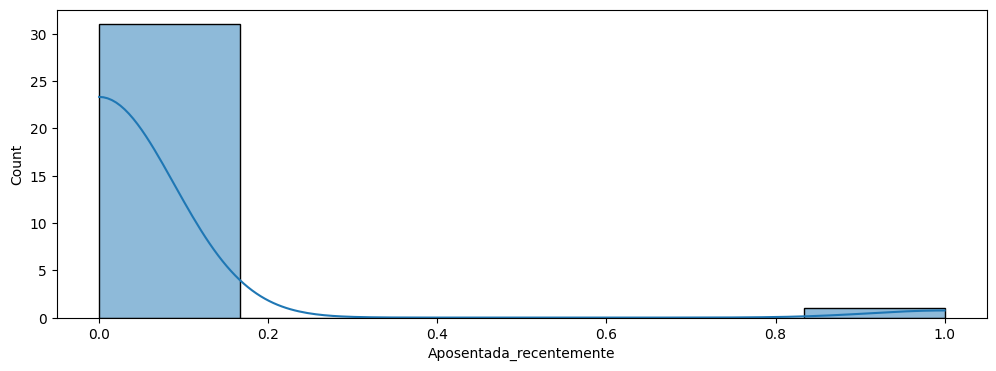

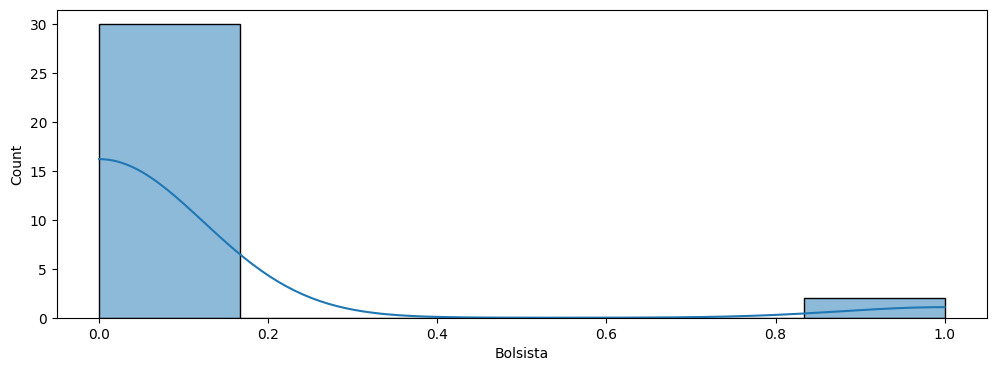

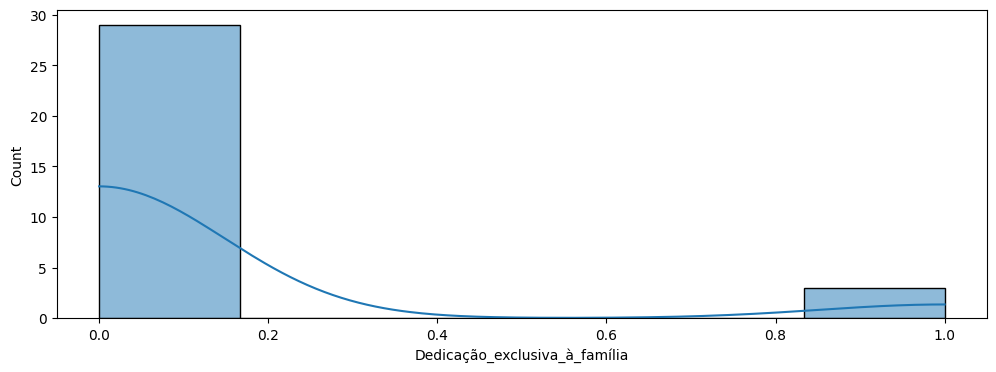

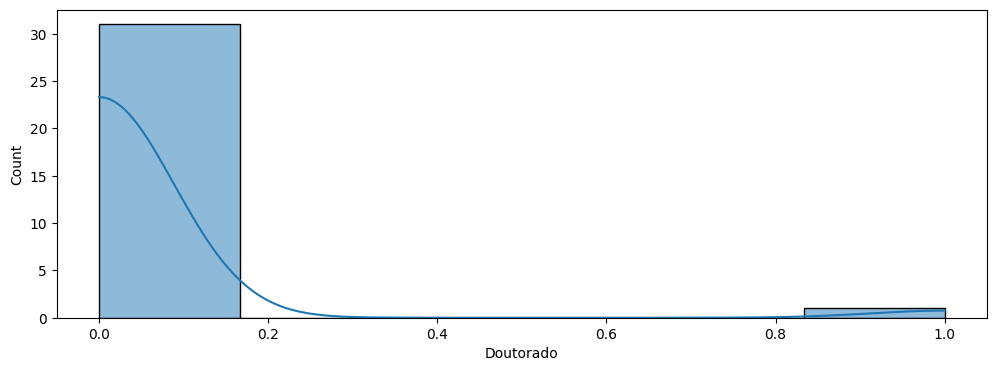

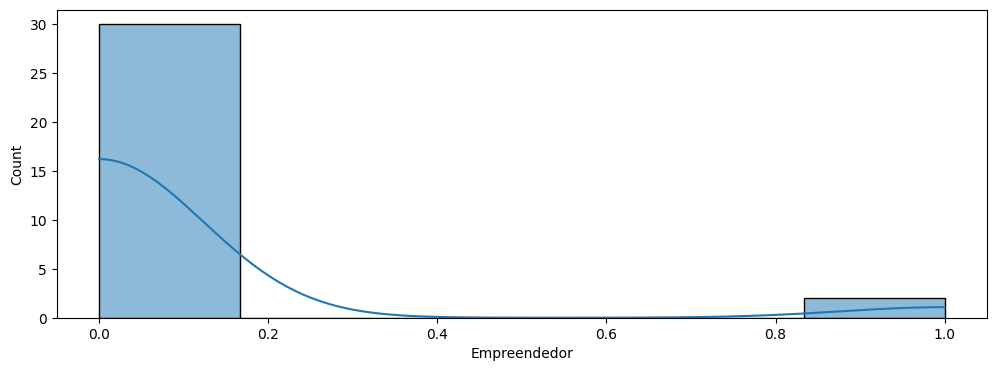

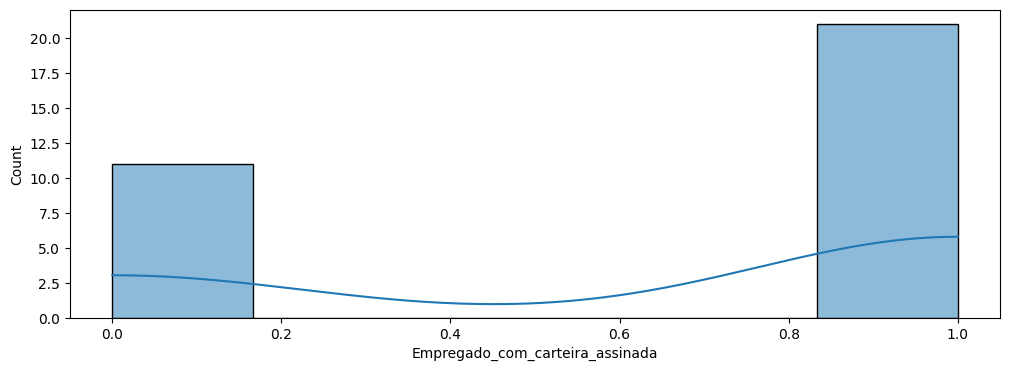

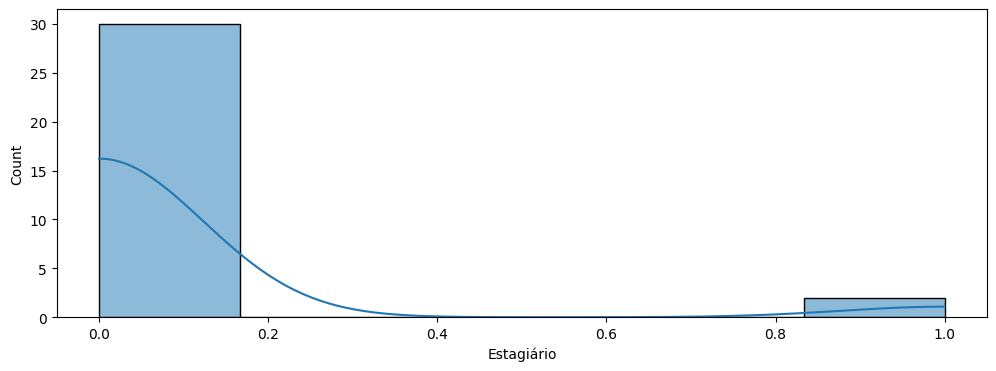

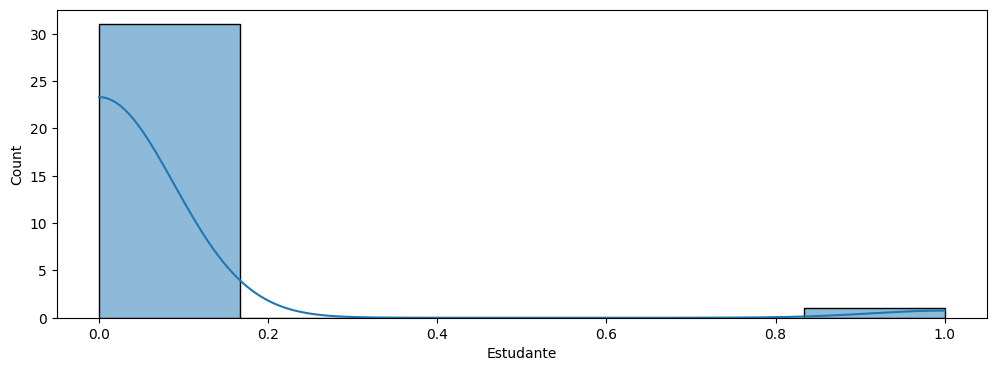

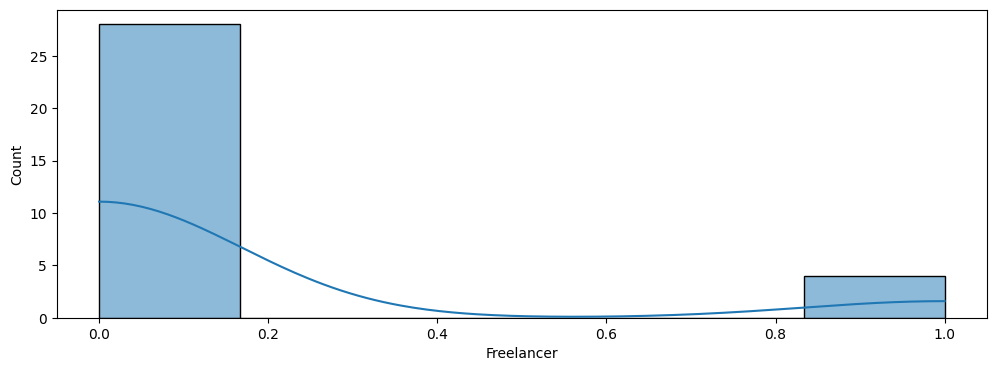

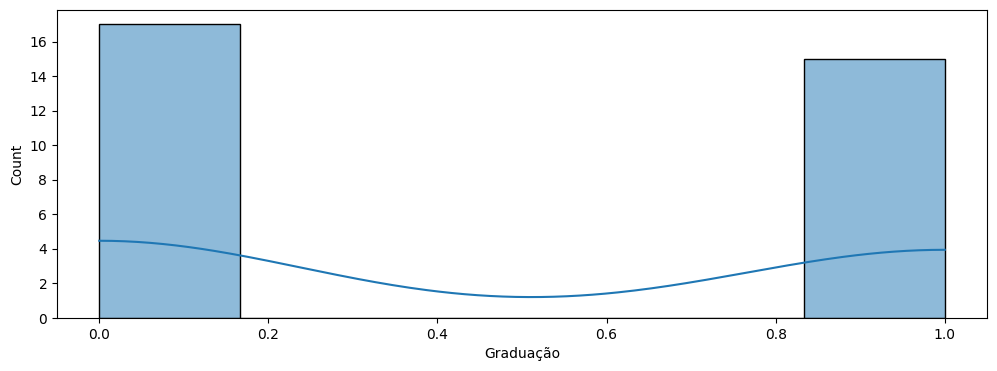

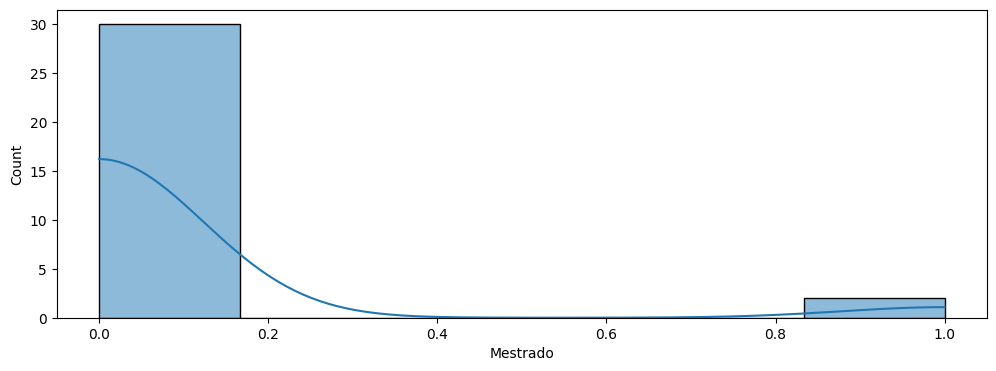

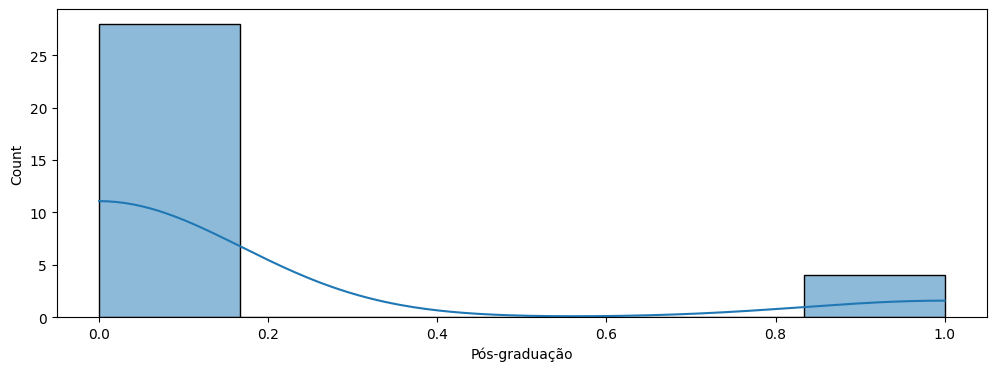

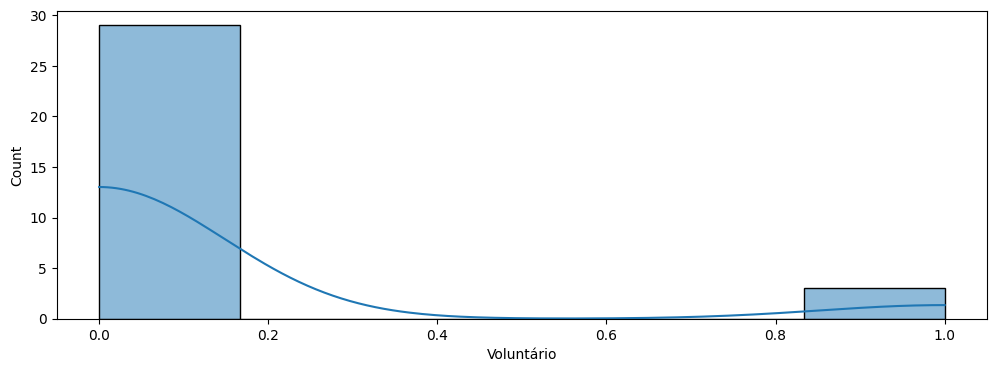

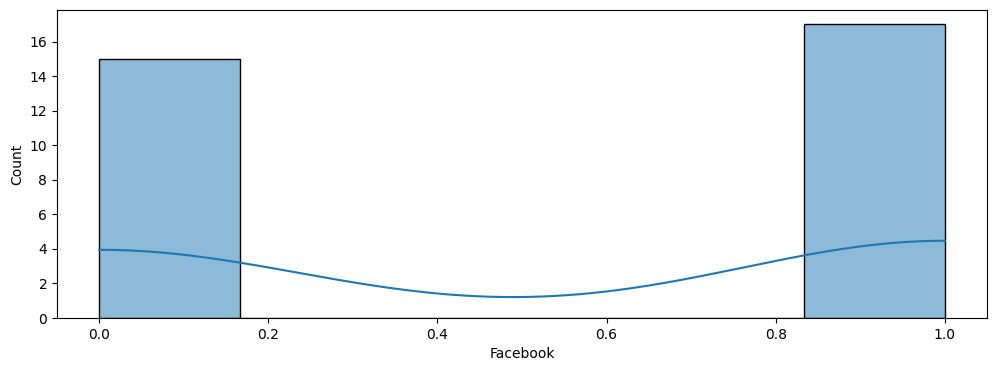

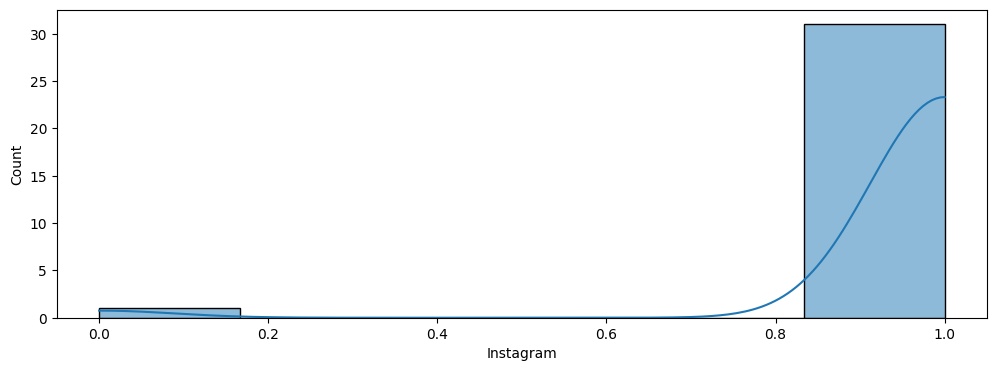

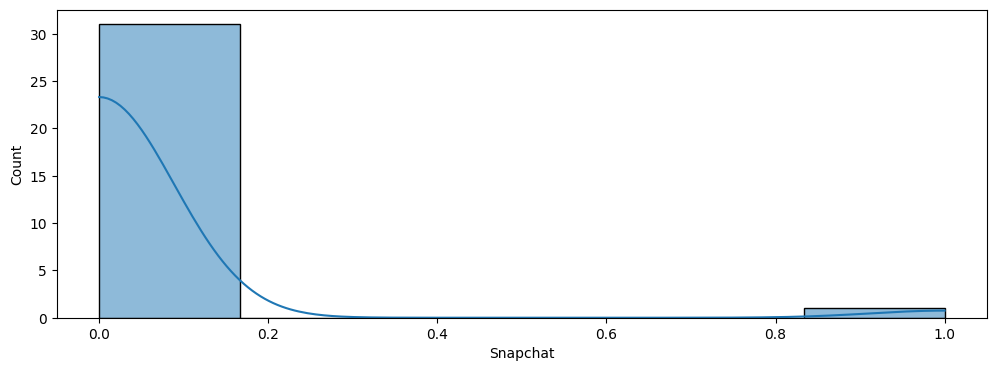

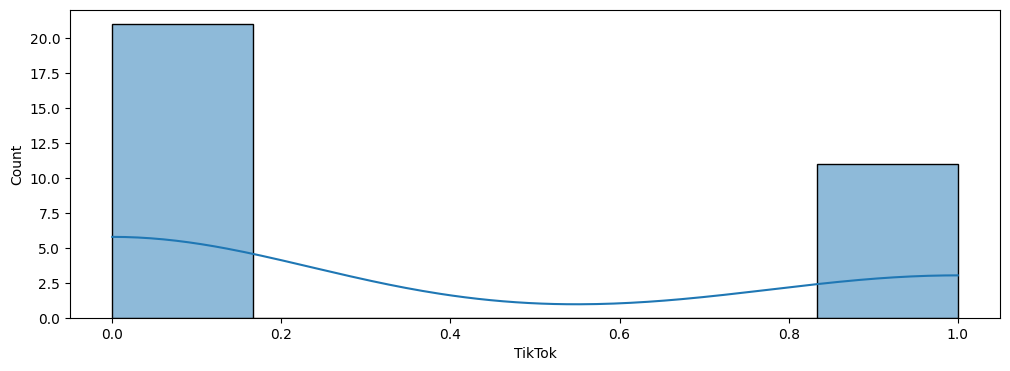

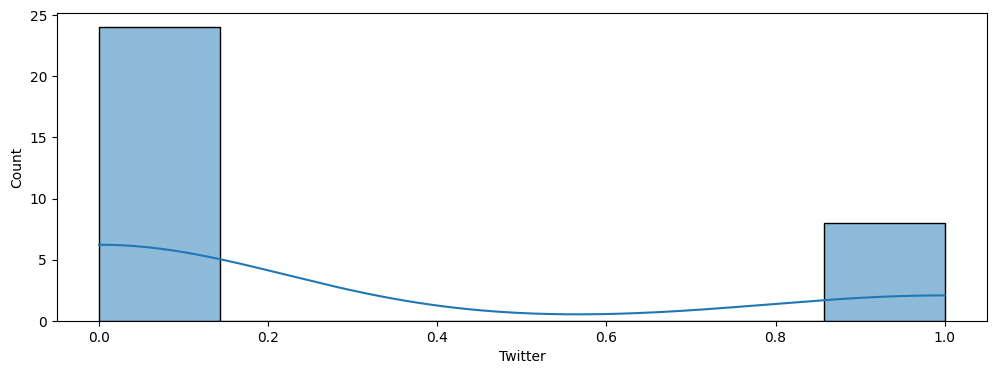

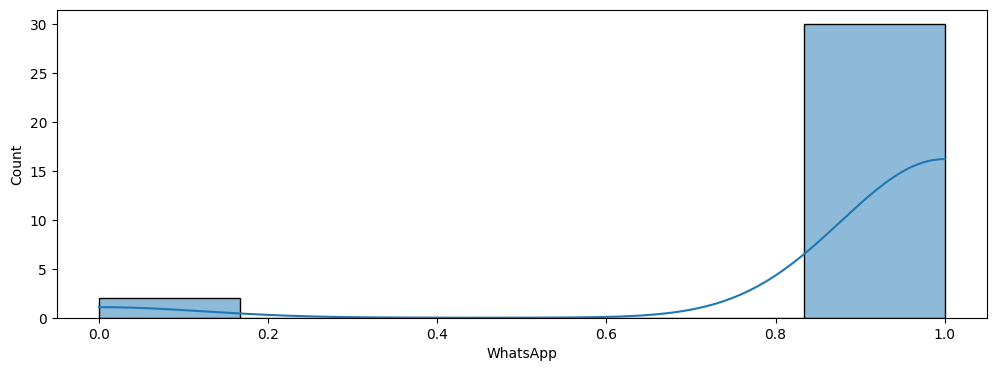

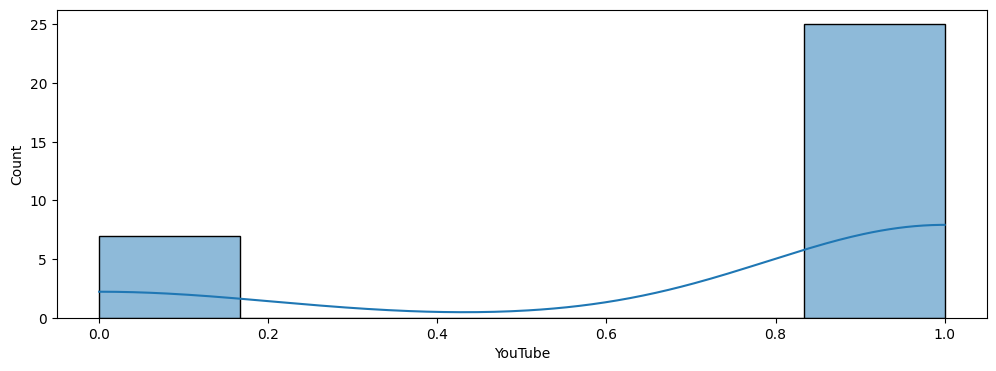

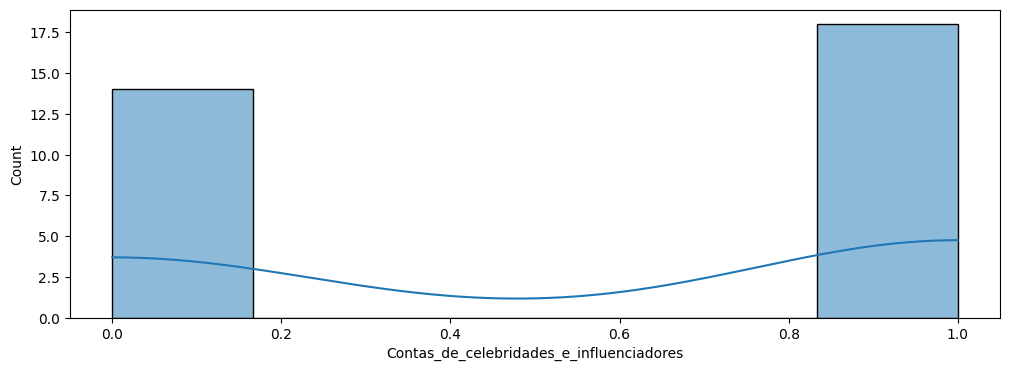

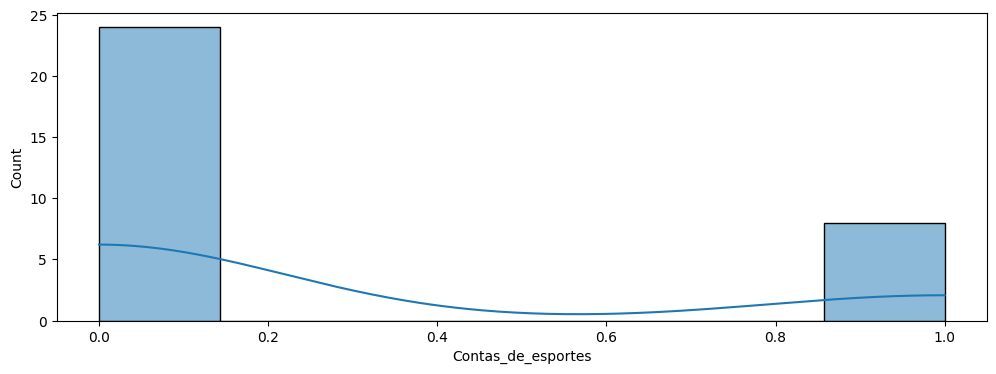

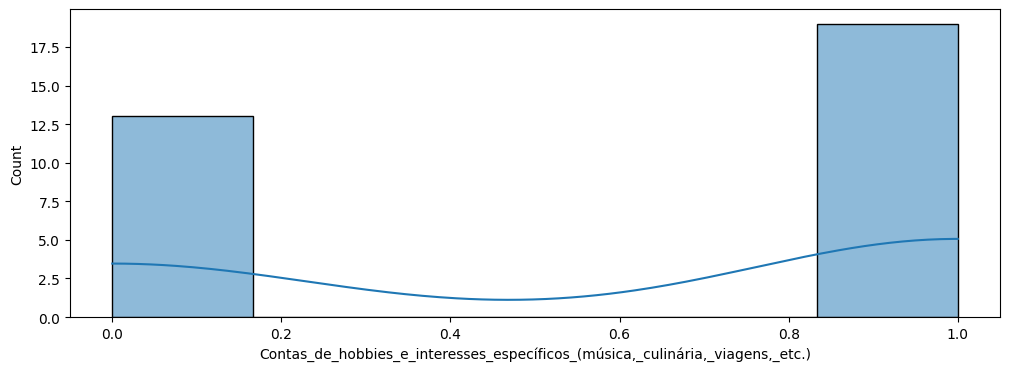

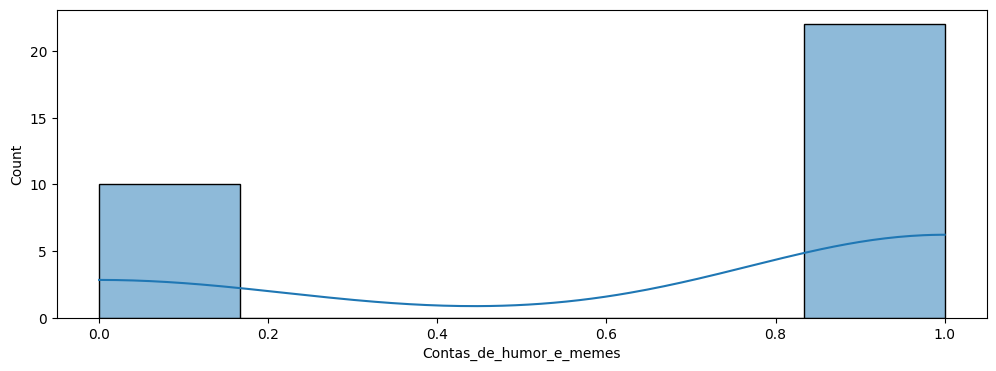

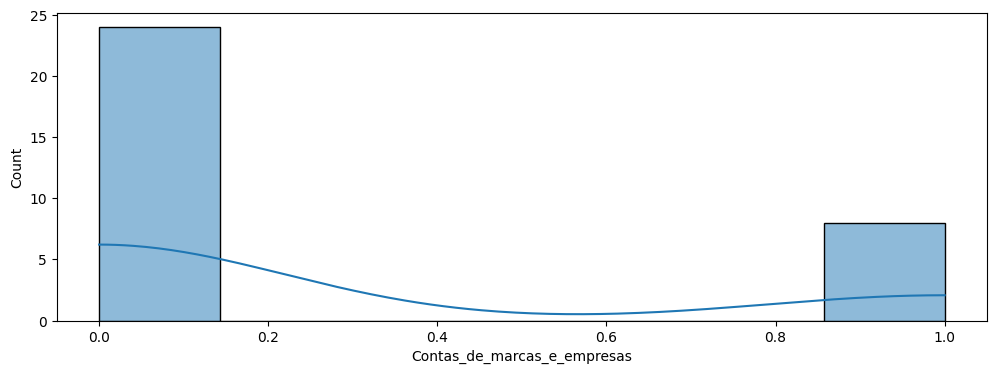

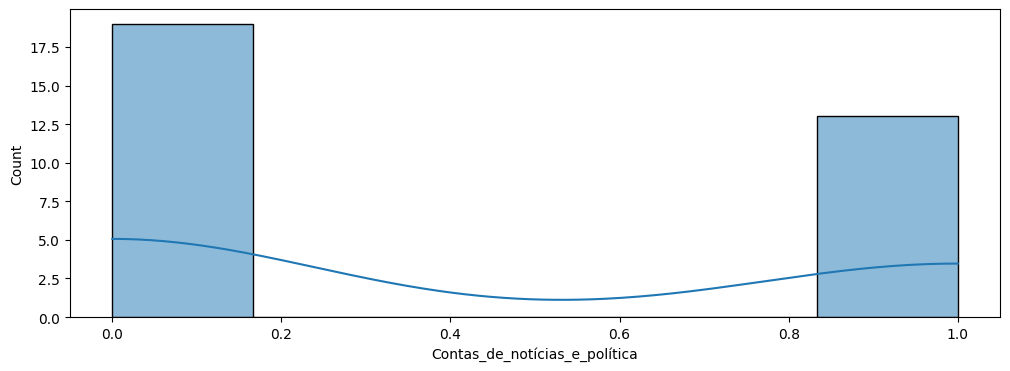

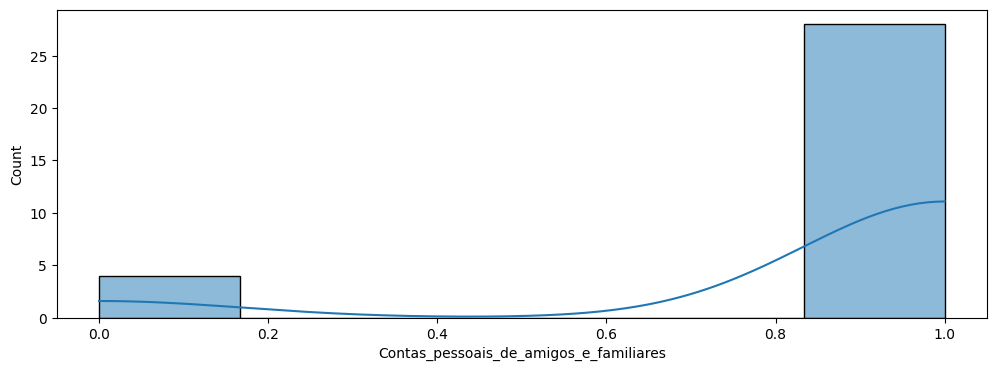

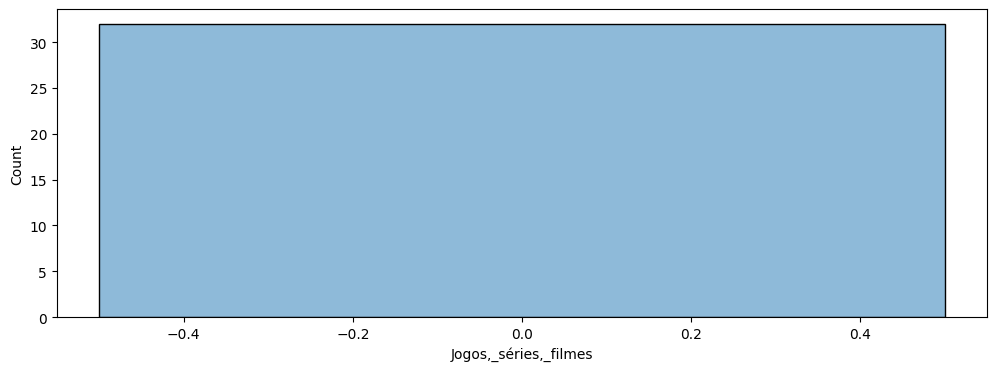

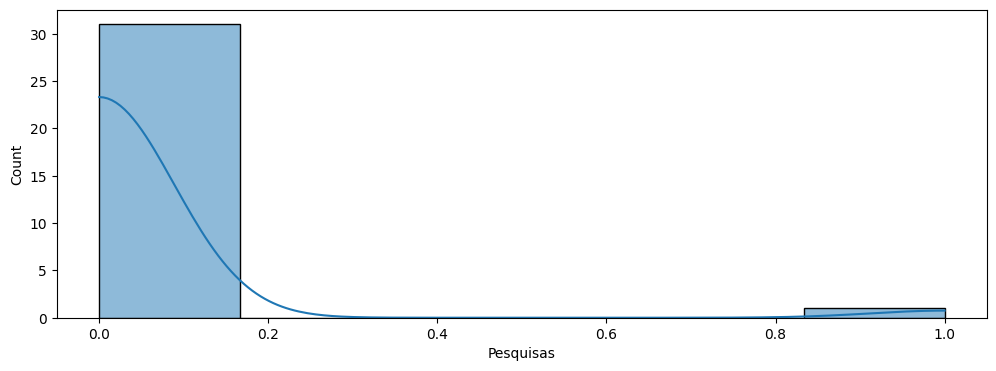

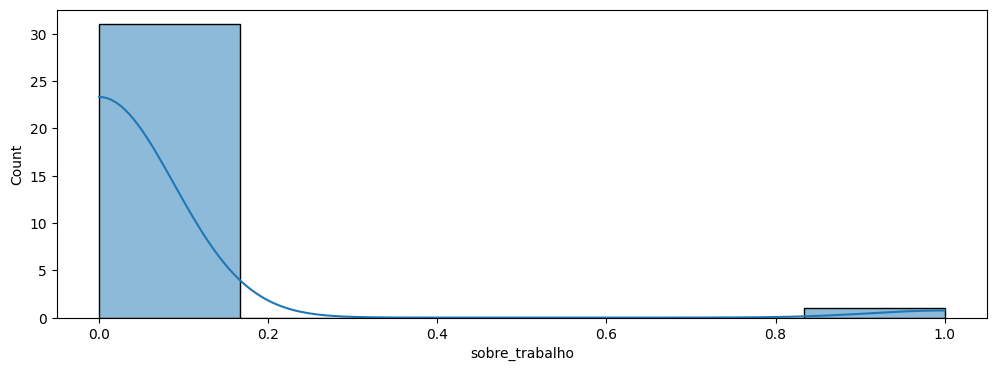

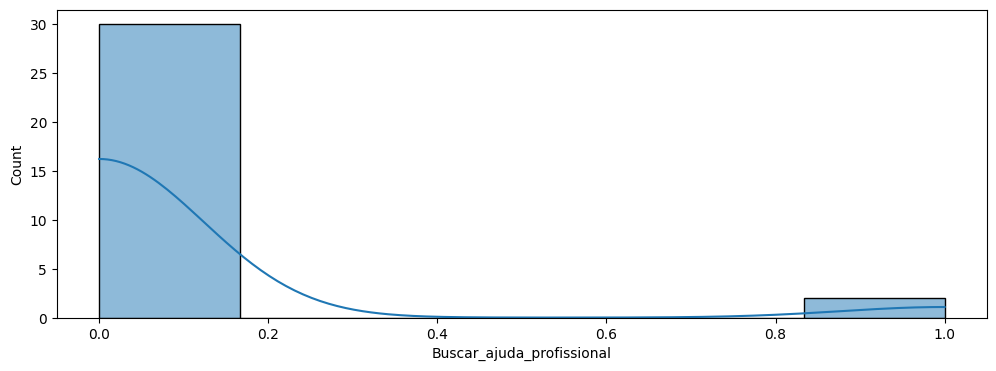

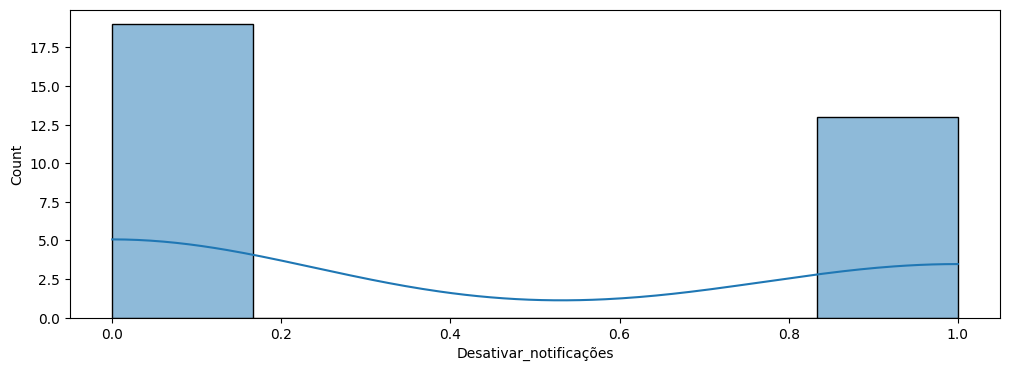

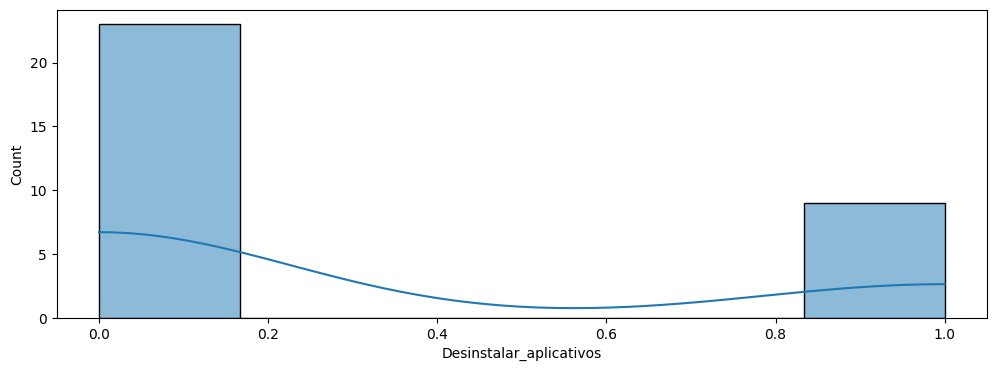

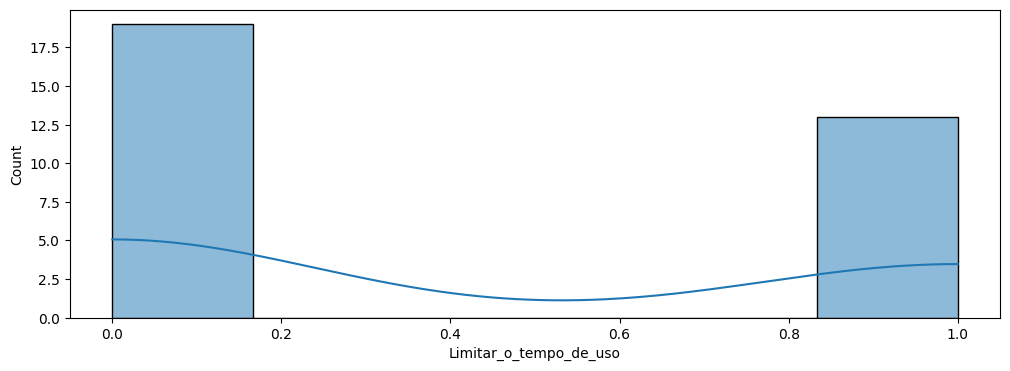

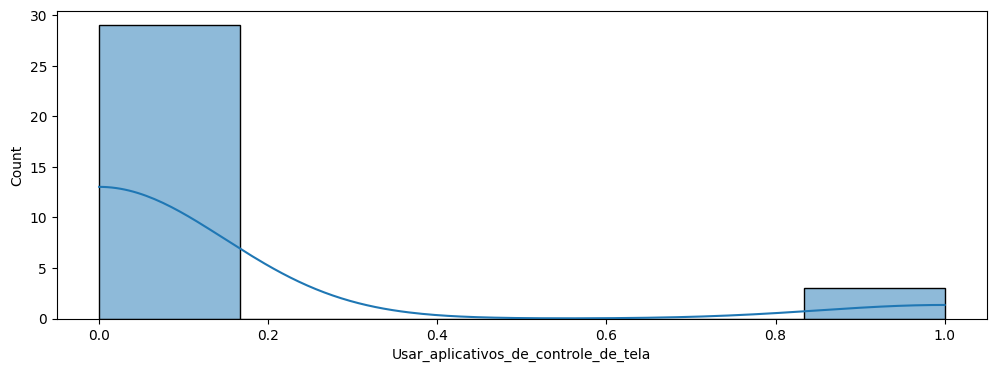

In [34]:
for coluna in dados_featutes_train.columns:
    plot_distribuicao(dados_featutes_train[coluna])

> **Quantidade de Nulos**

In [35]:
dados_targets_train.isna().sum().sort_values()

AnsiedadeRedes         1
PreocupaçãoNegativa    1
FrequenciaDepressão    1
dtype: int64

In [36]:
dados_featutes_train.isna().sum().sort_values()

Id                                                                                0
Graduação                                                                         0
Mestrado                                                                          0
Pós-graduação                                                                     0
Voluntário                                                                        0
Facebook                                                                          0
Instagram                                                                         0
Snapchat                                                                          0
TikTok                                                                            0
Twitter                                                                           0
WhatsApp                                                                          0
YouTube                                                                     

> **Outliers**

In [37]:
#Função para plotar os graficos repetidamente
def plota_boxplot(dados):
    plt.figure(figsize=(12,4))
    sns.boxplot(dados, orient='h')

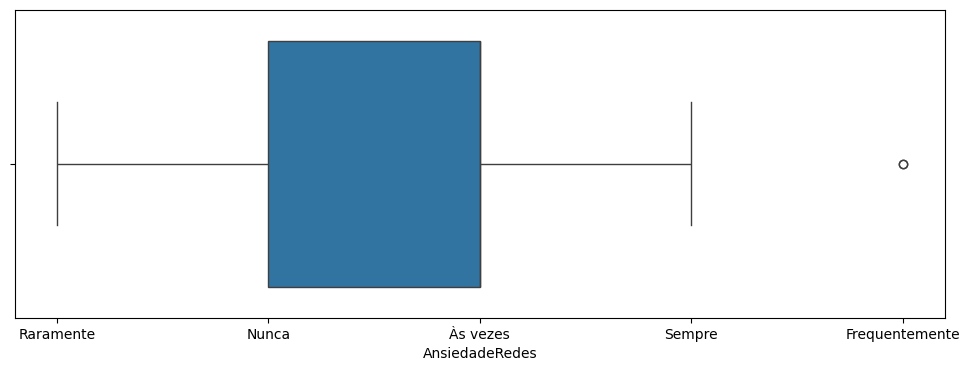

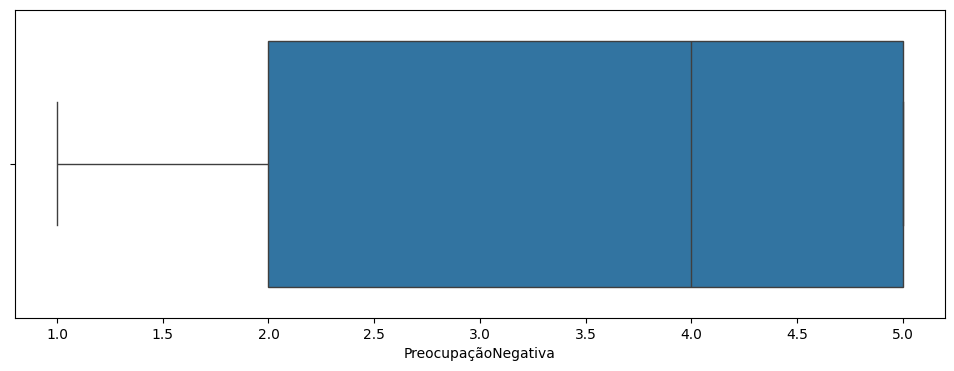

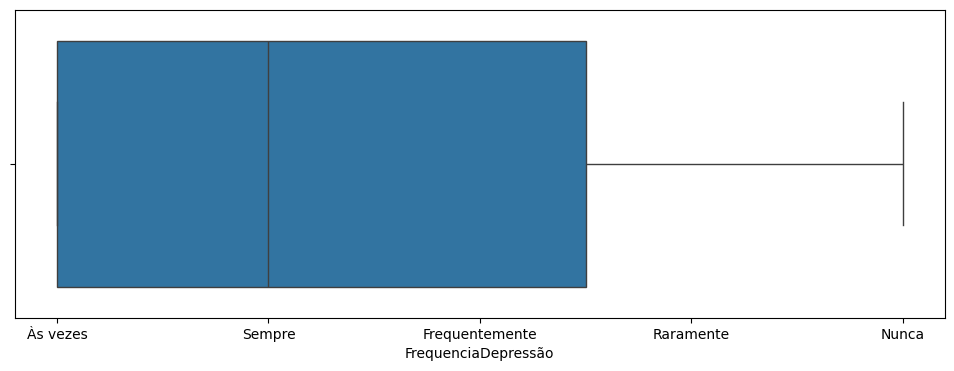

In [38]:
for coluna in dados_targets_train.columns:
    plota_boxplot(dados_targets_train[coluna])

C:\Users\Cosmo\AppData\Local\Temp\ipykernel_7124\3812976854.py:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure(figsize=(12,4))


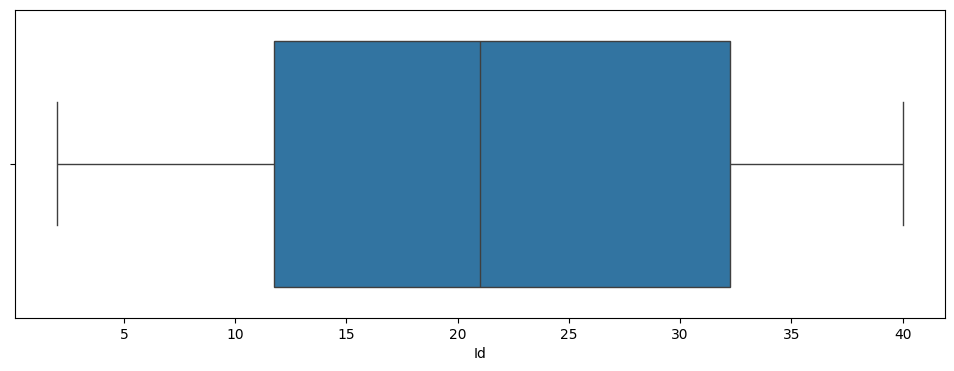

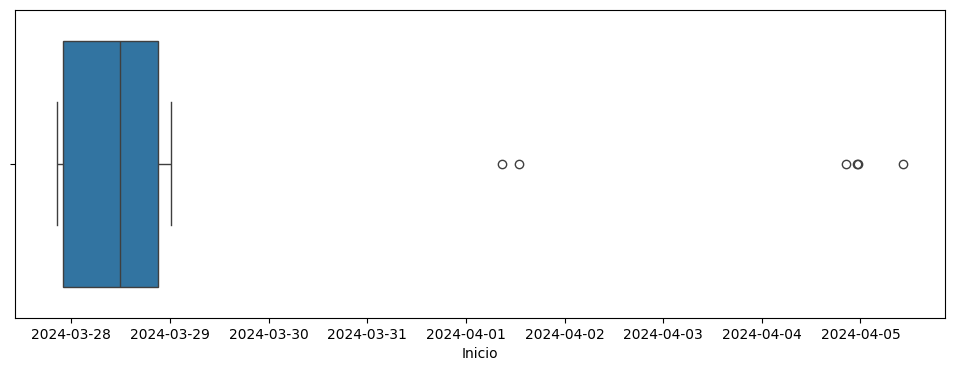

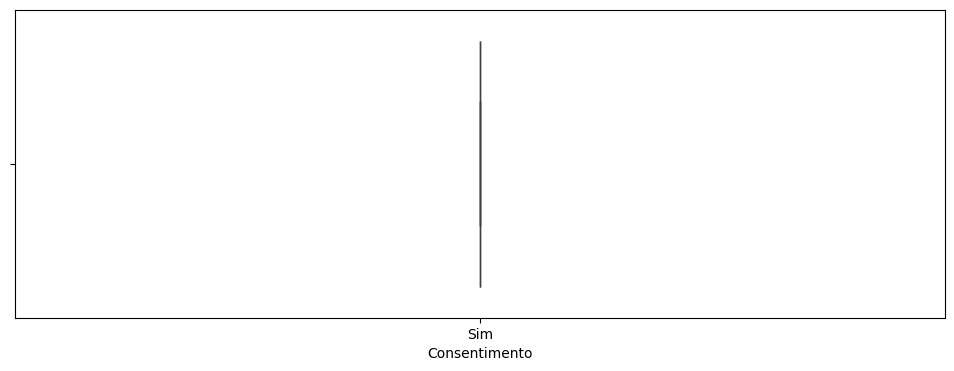

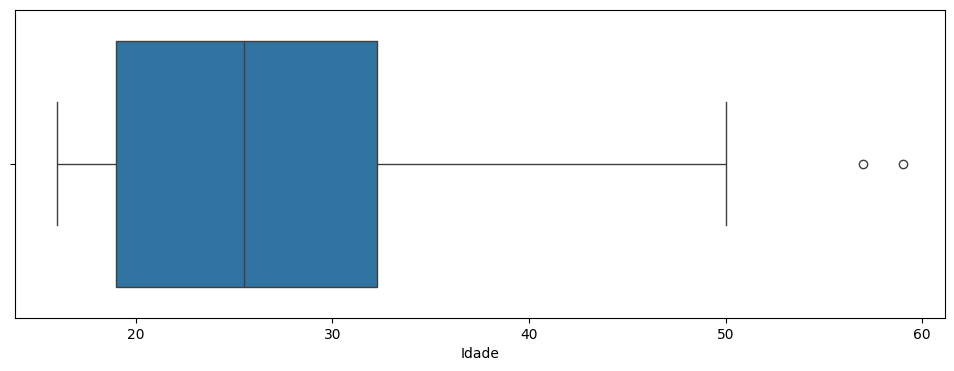

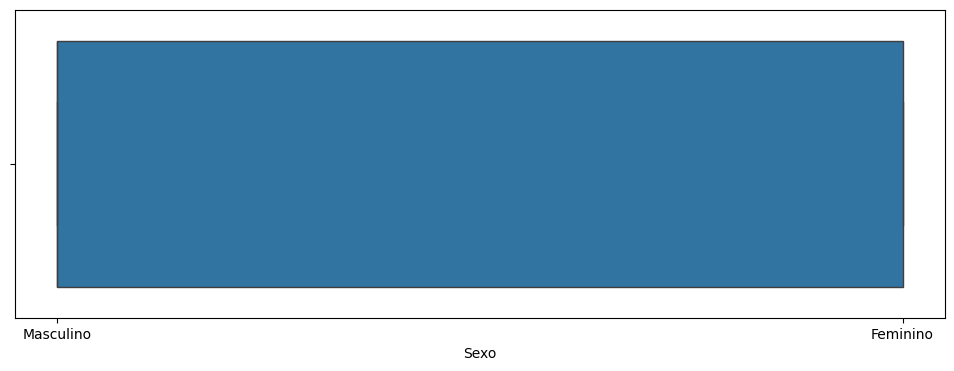

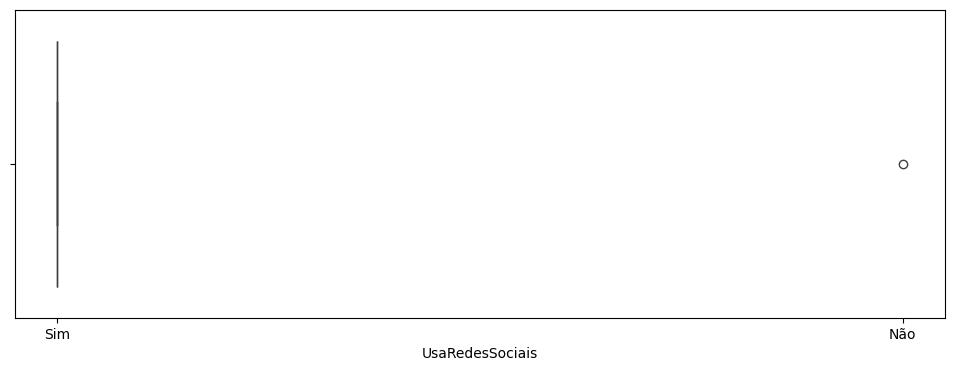

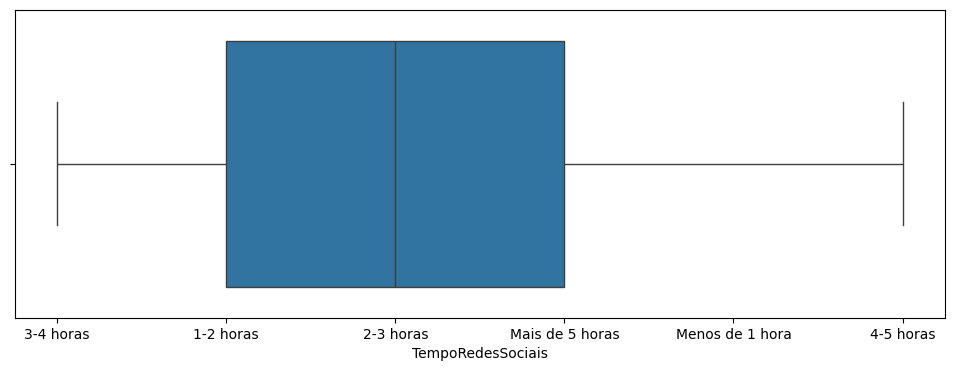

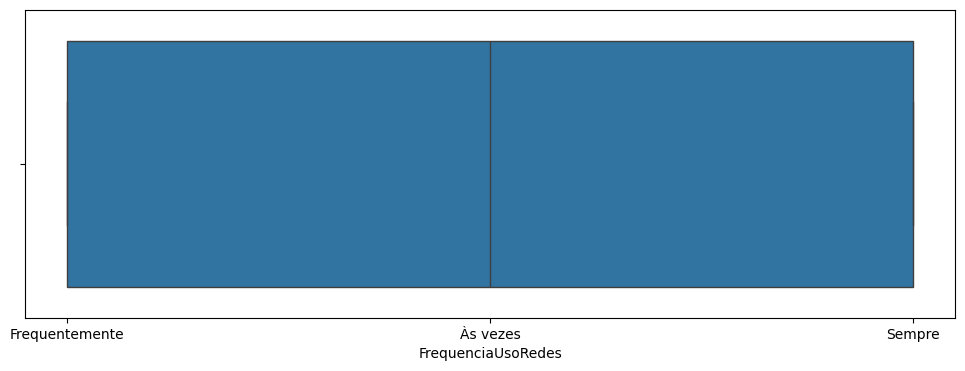

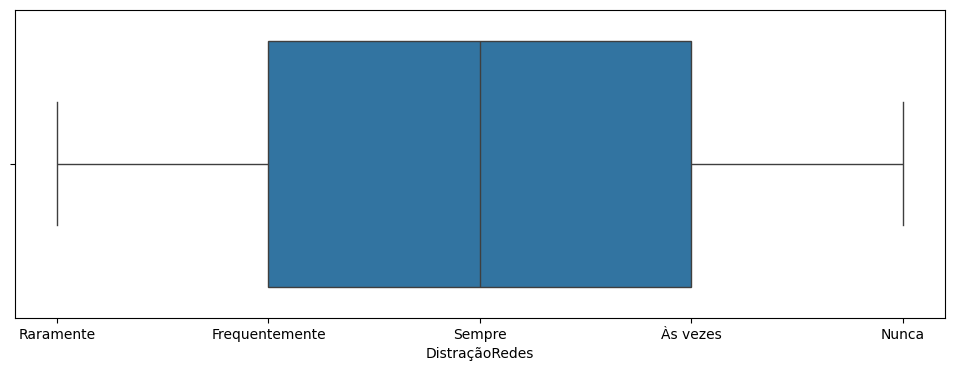

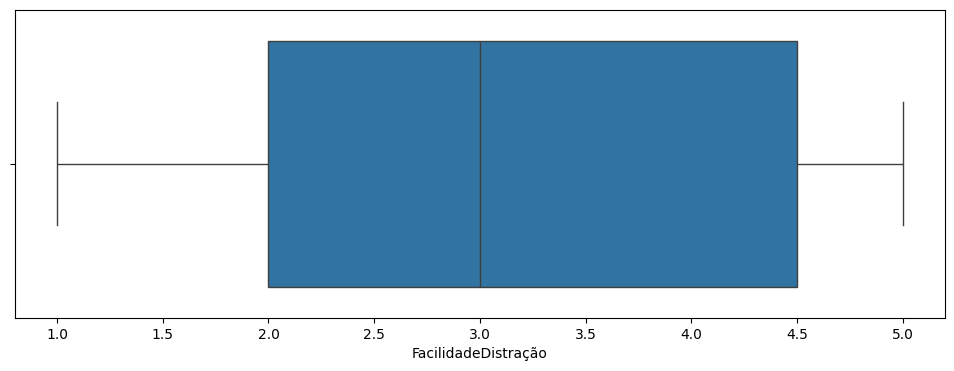

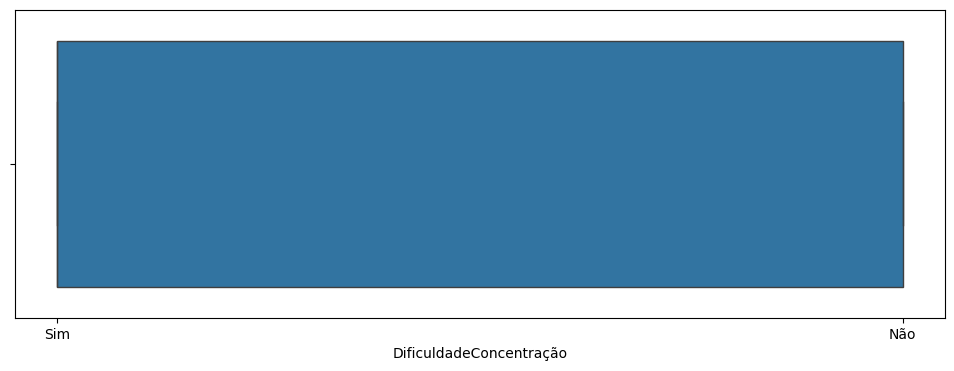

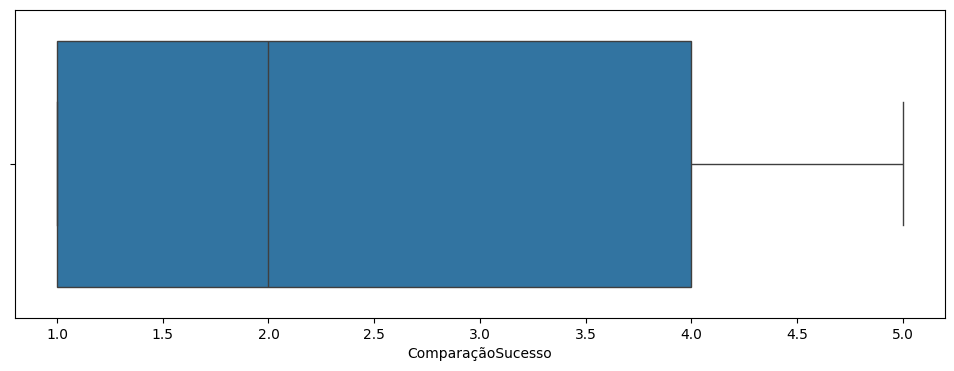

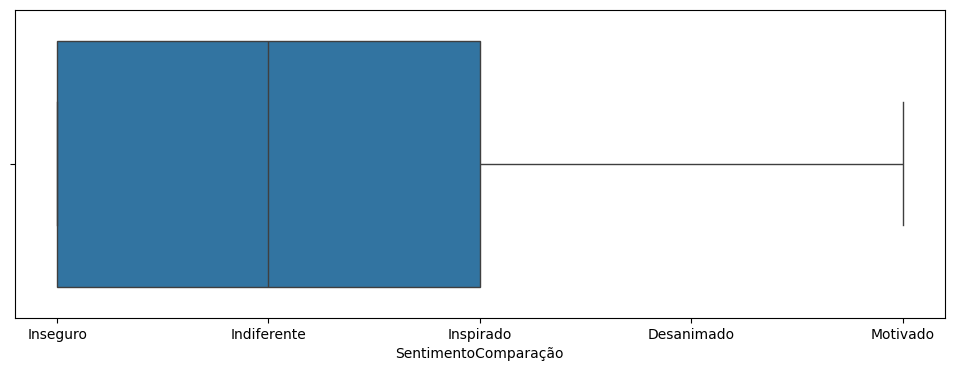

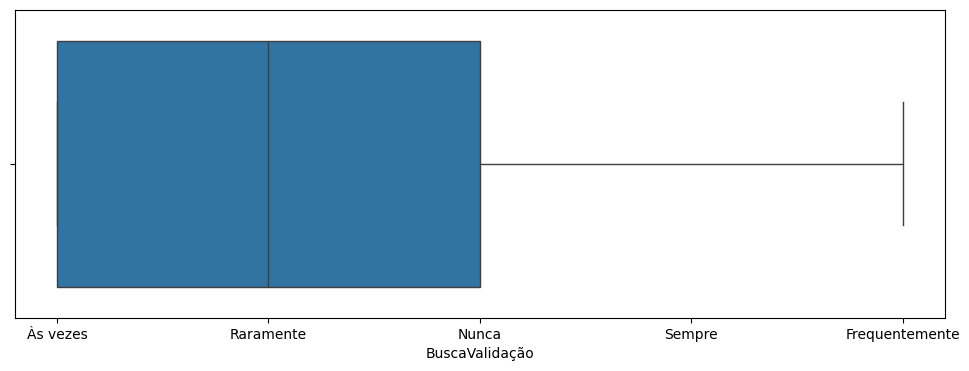

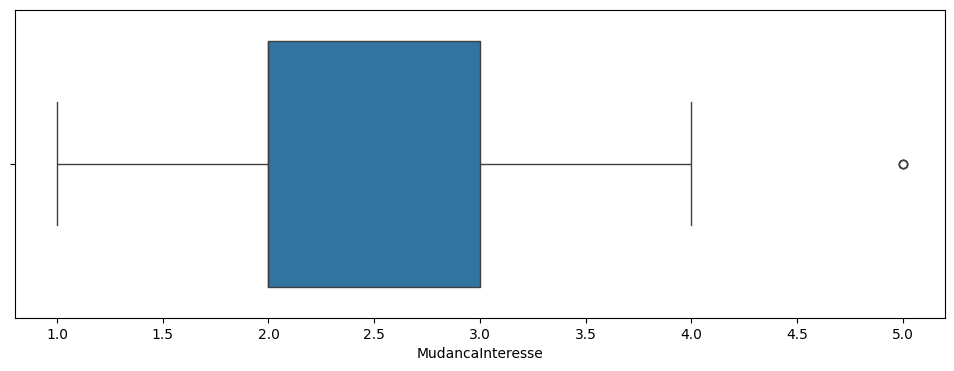

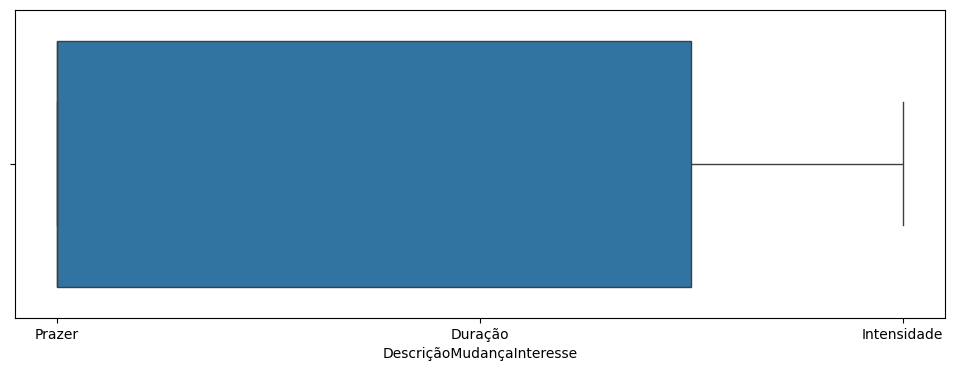

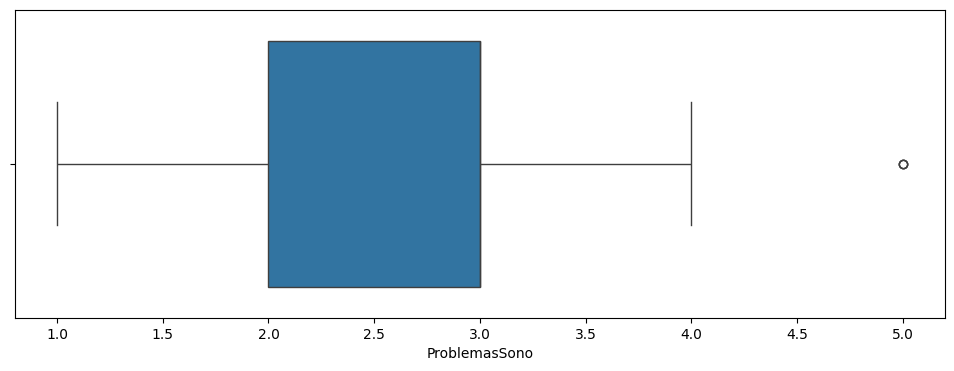

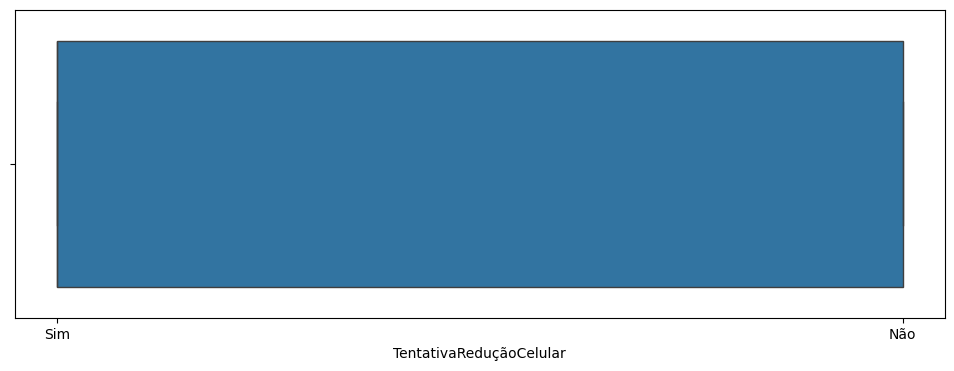

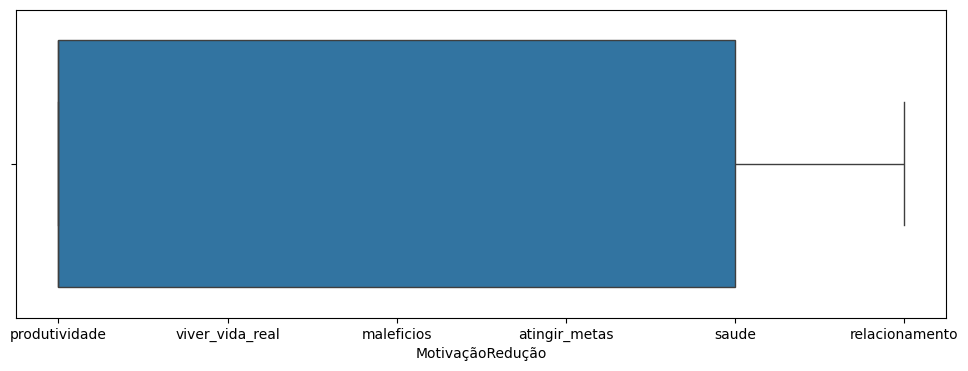

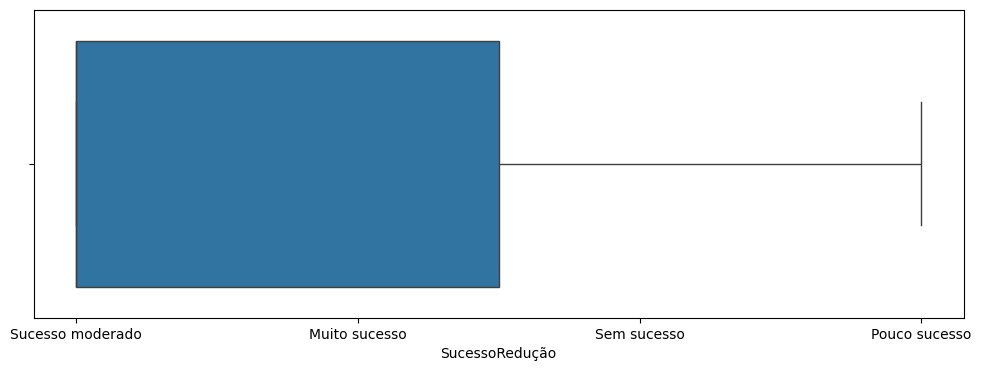

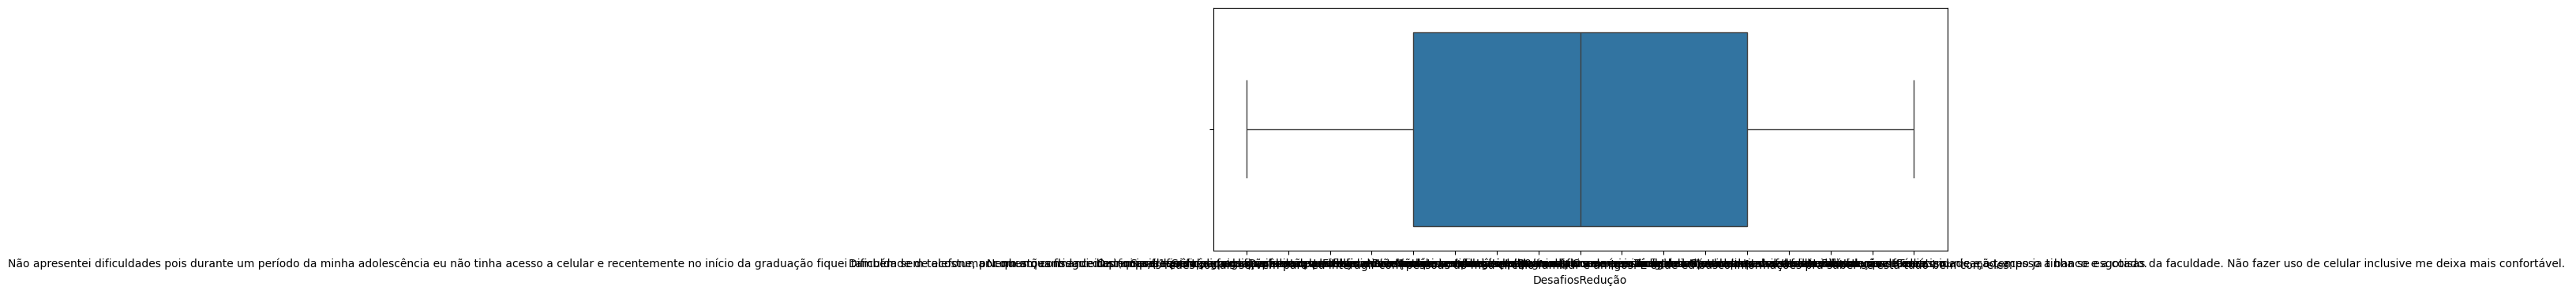

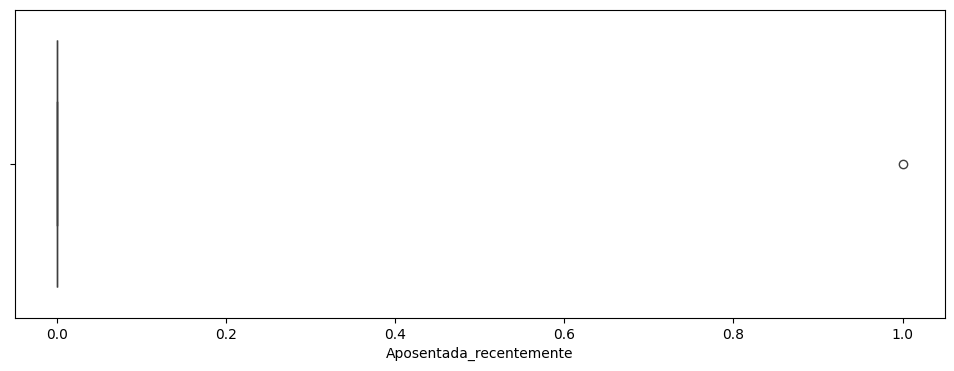

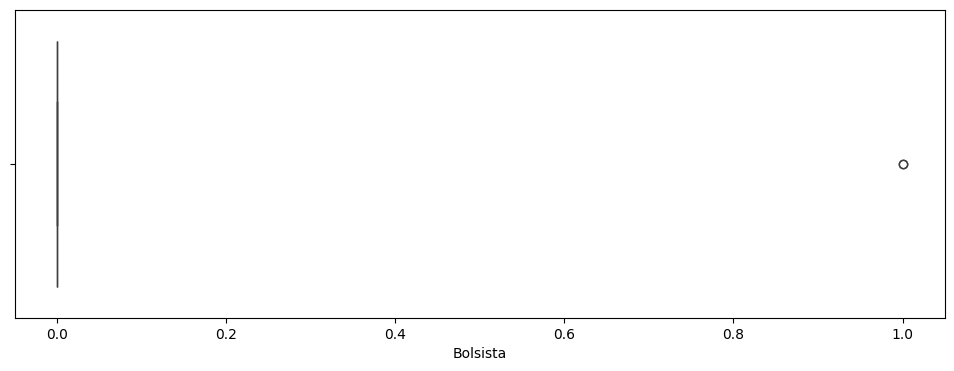

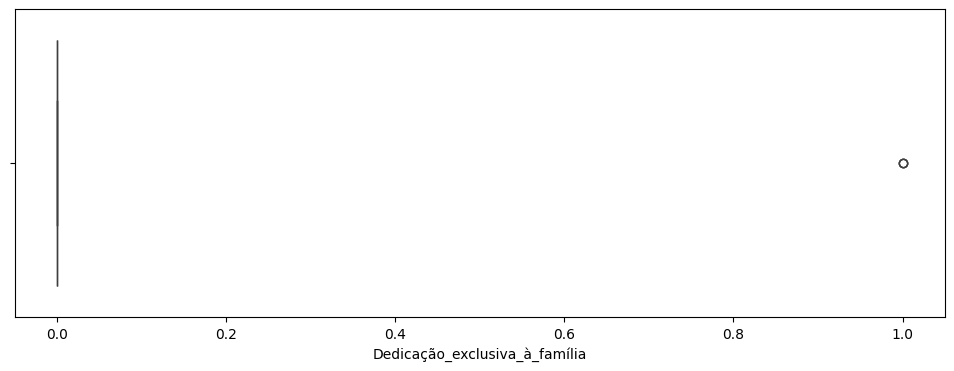

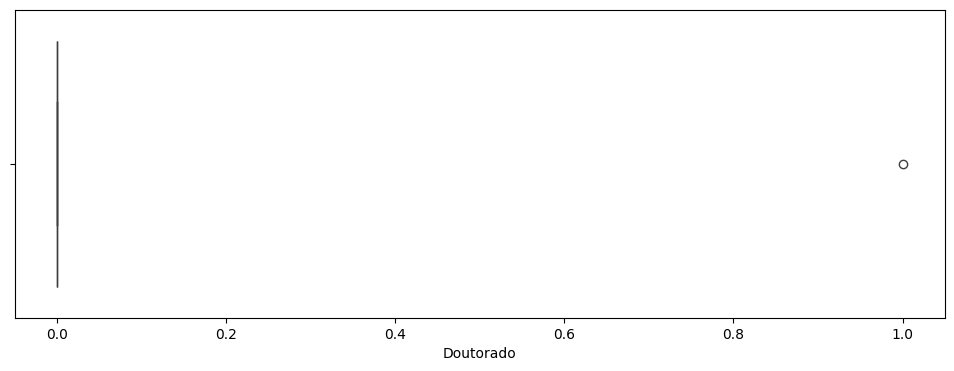

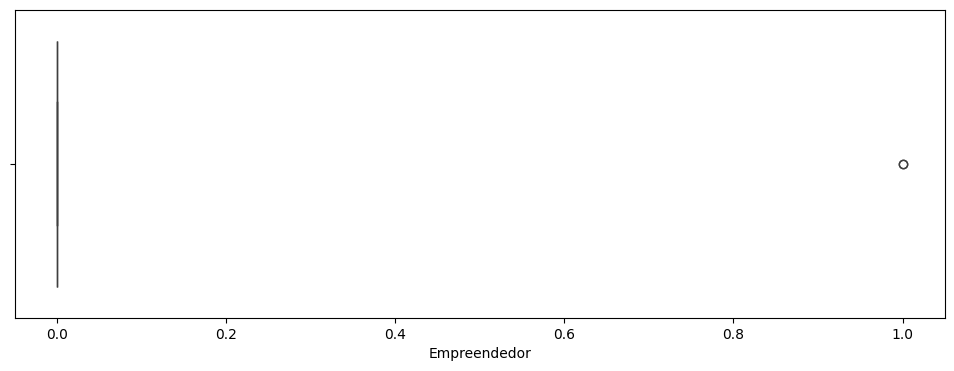

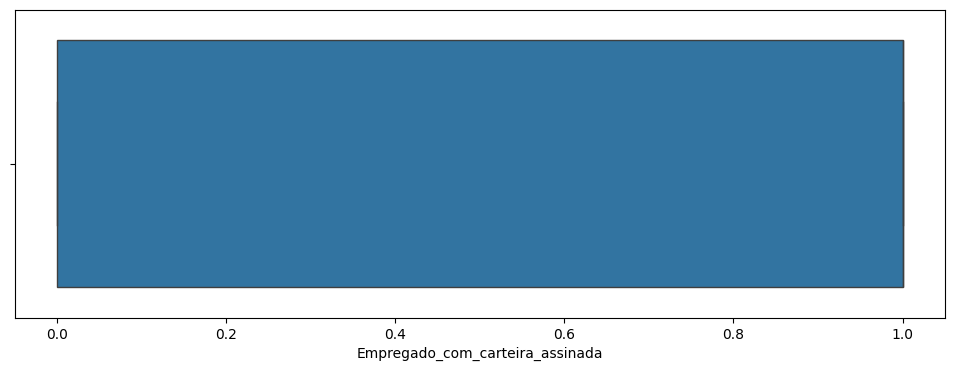

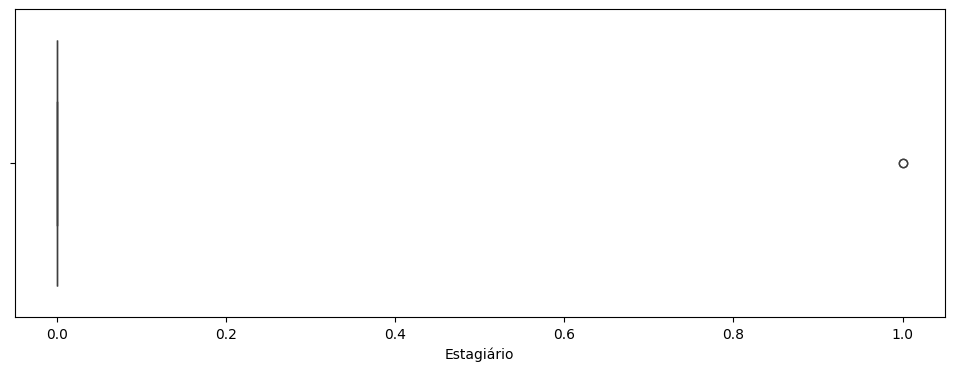

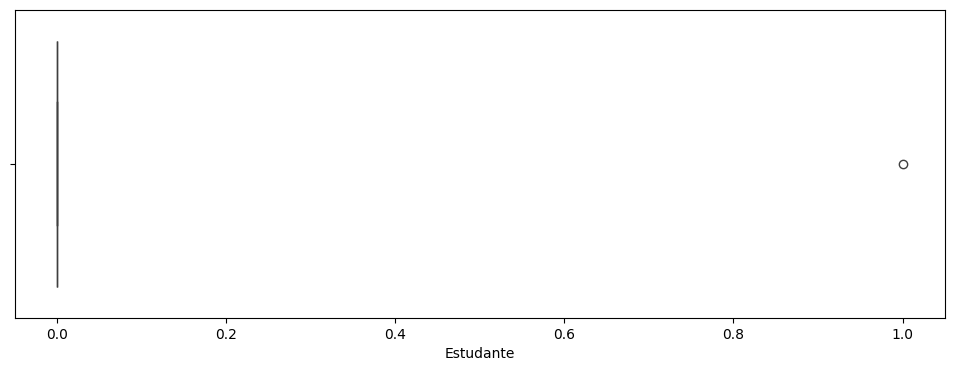

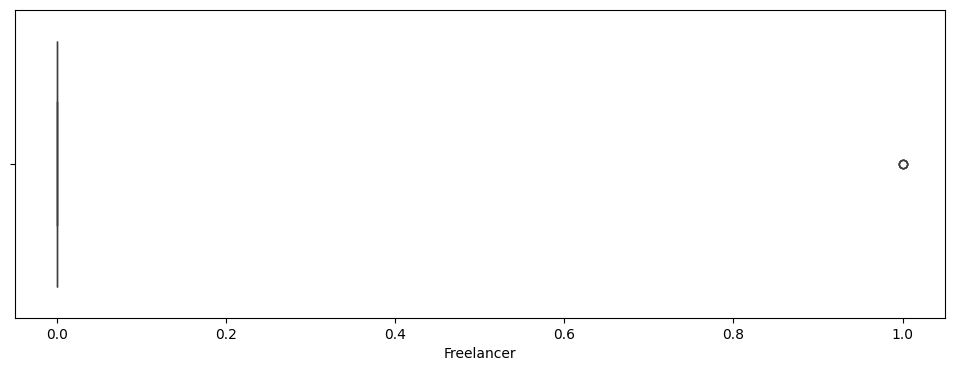

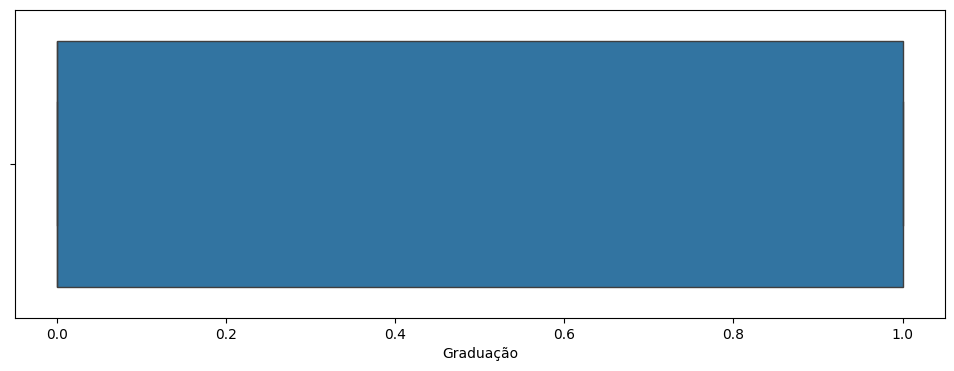

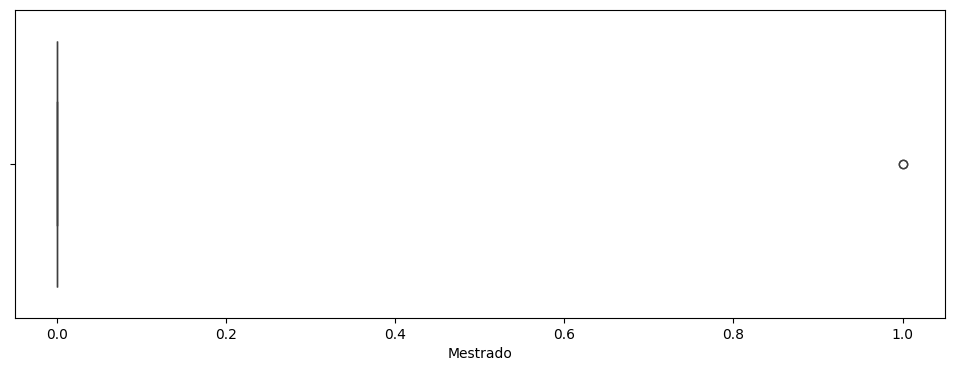

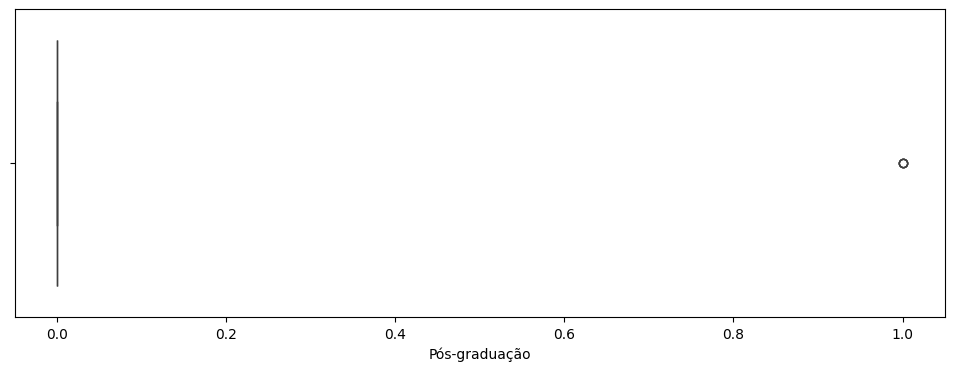

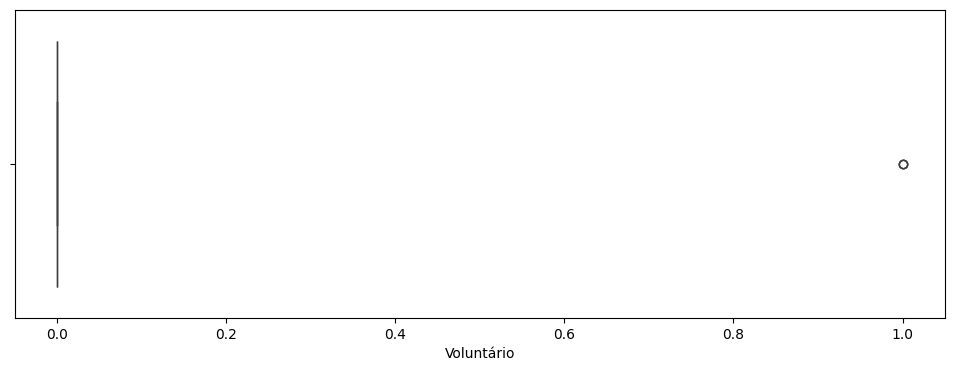

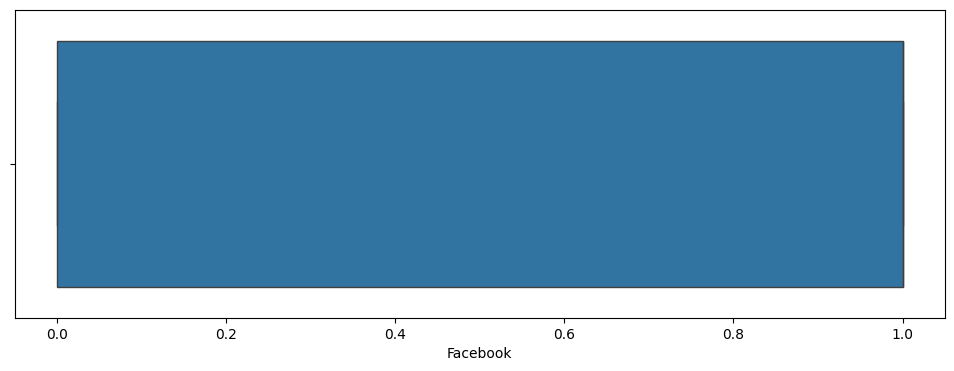

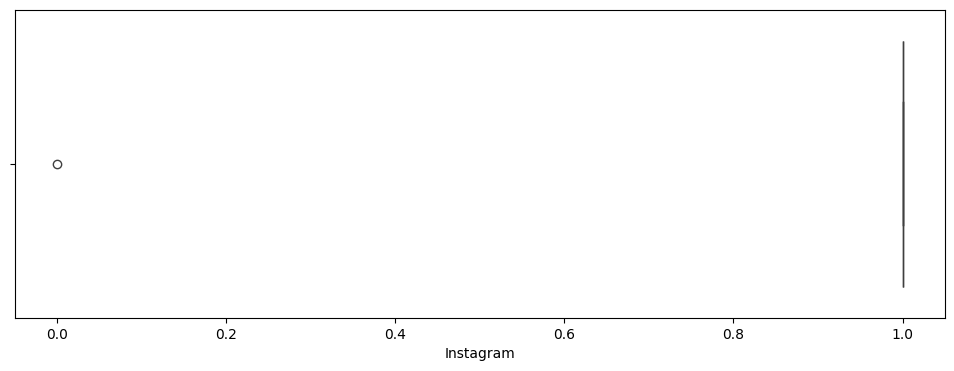

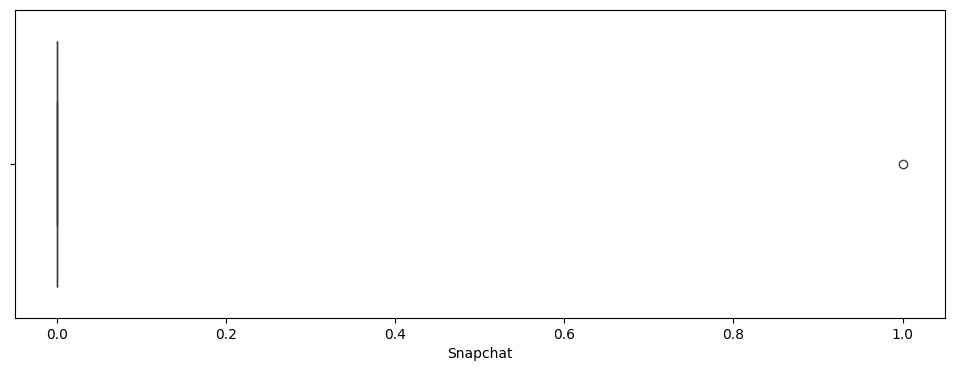

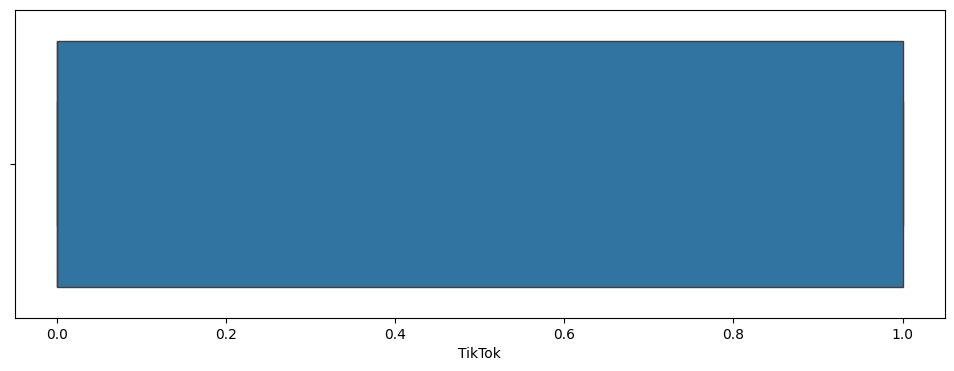

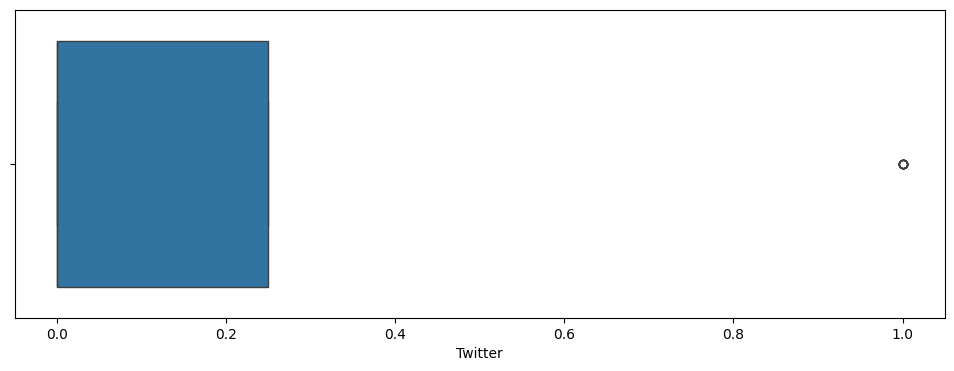

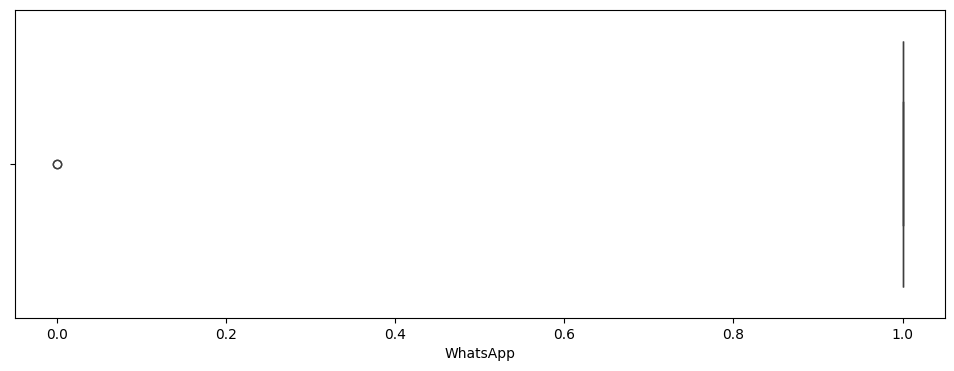

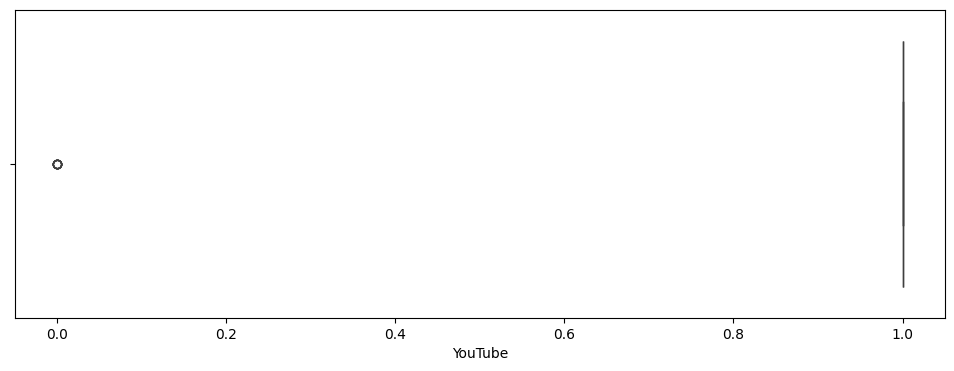

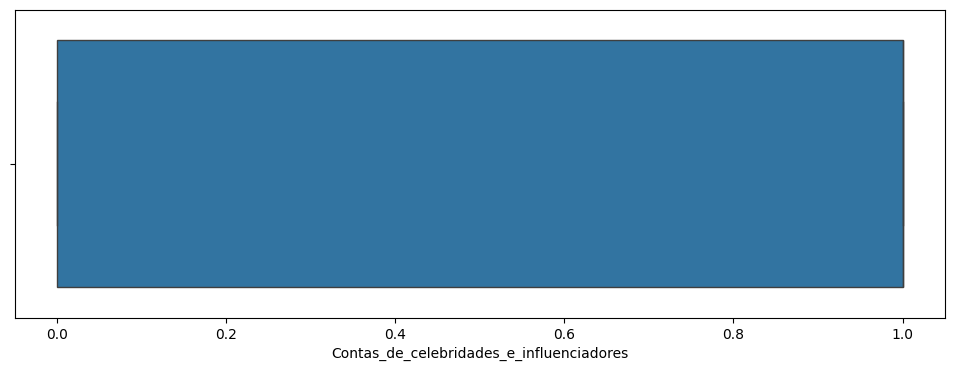

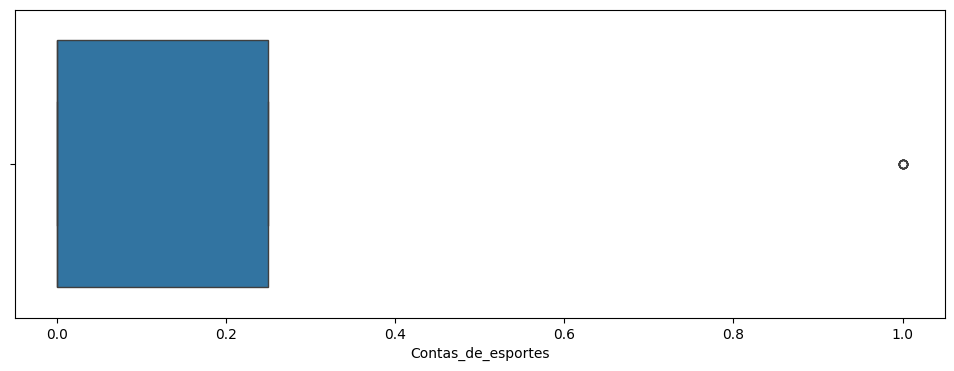

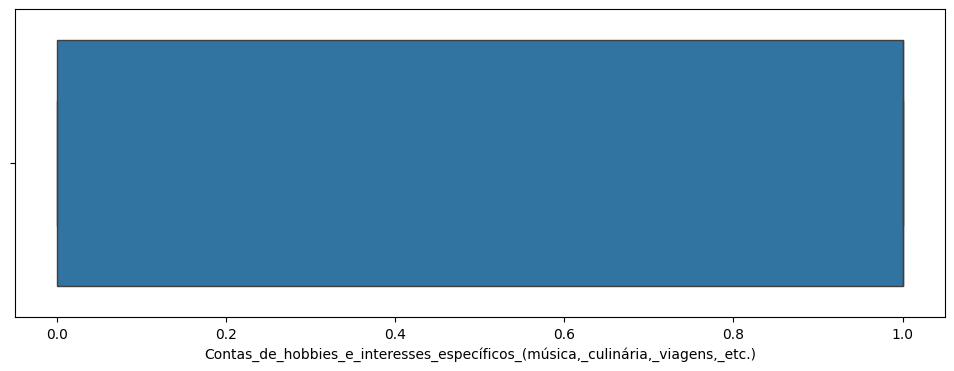

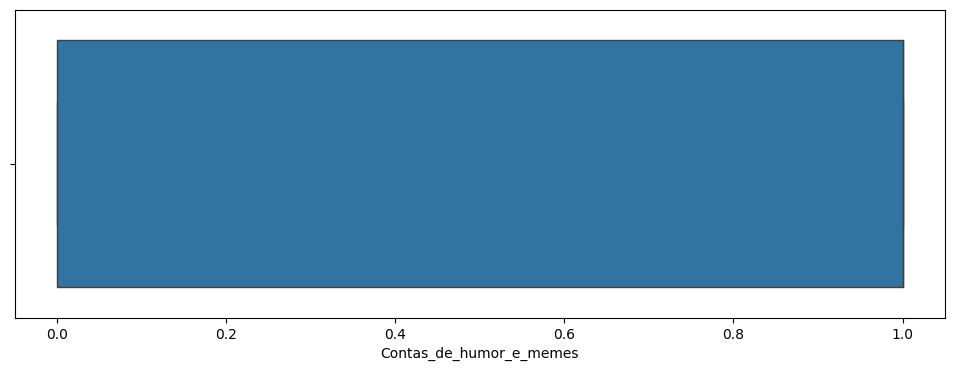

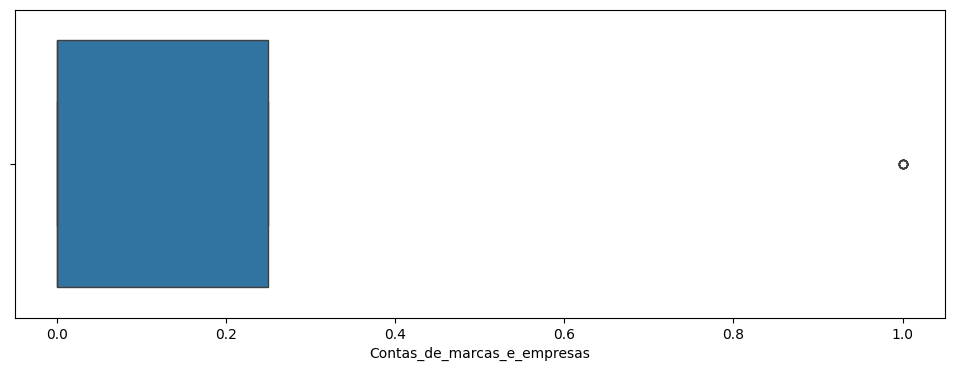

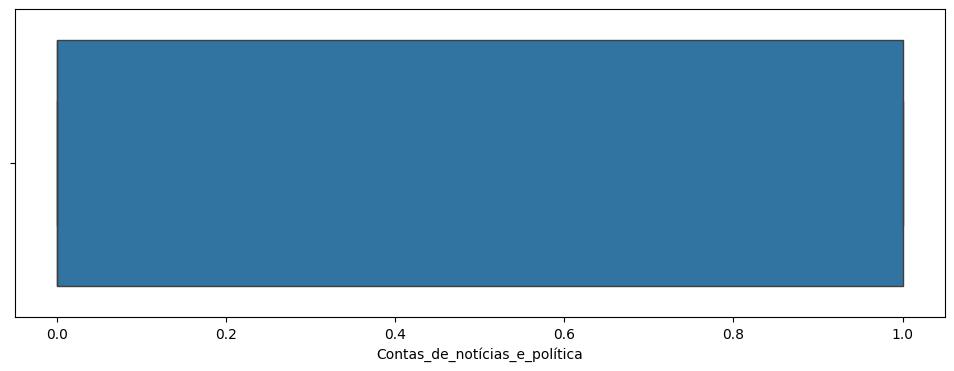

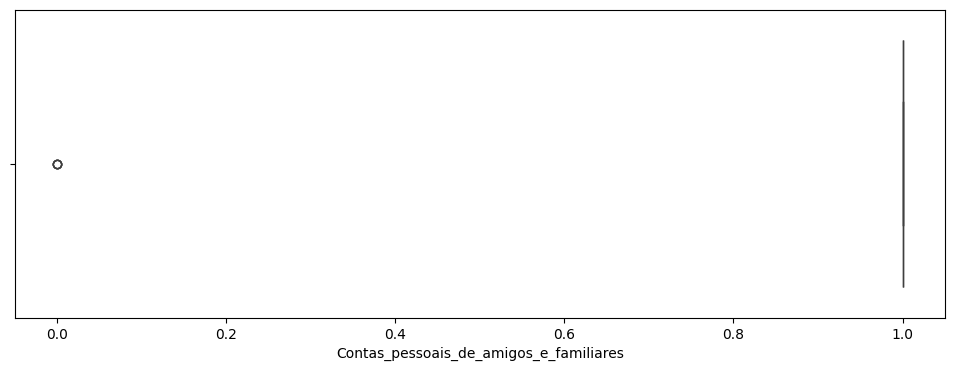

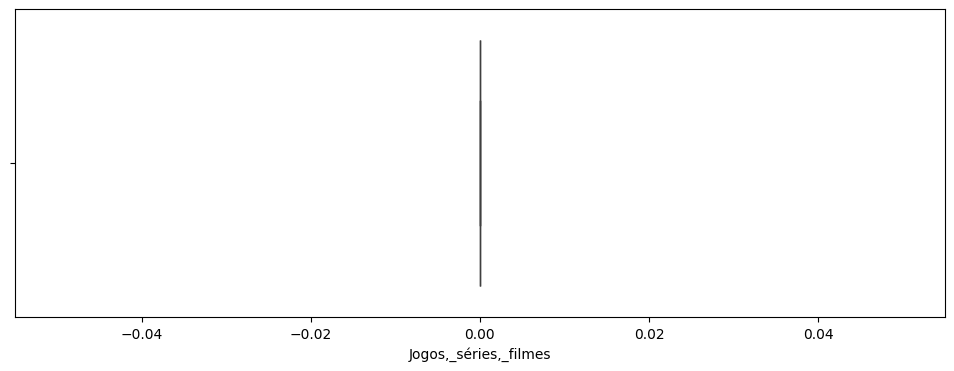

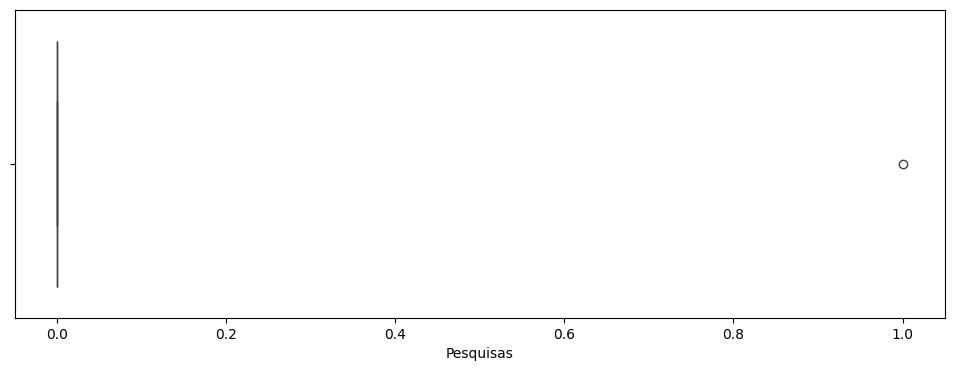

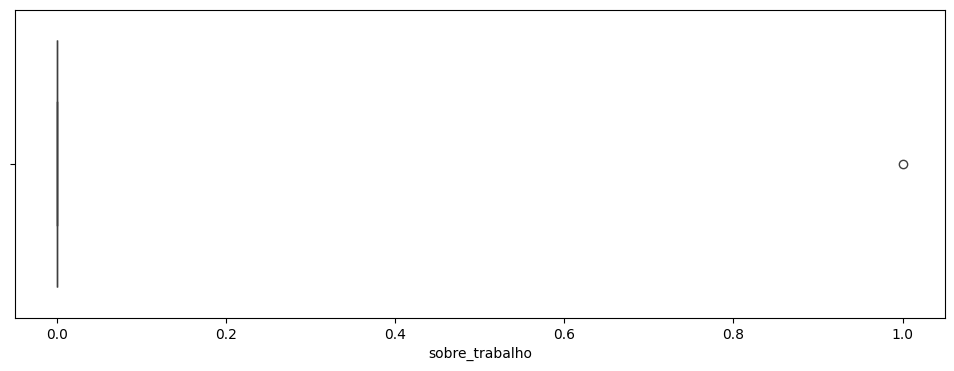

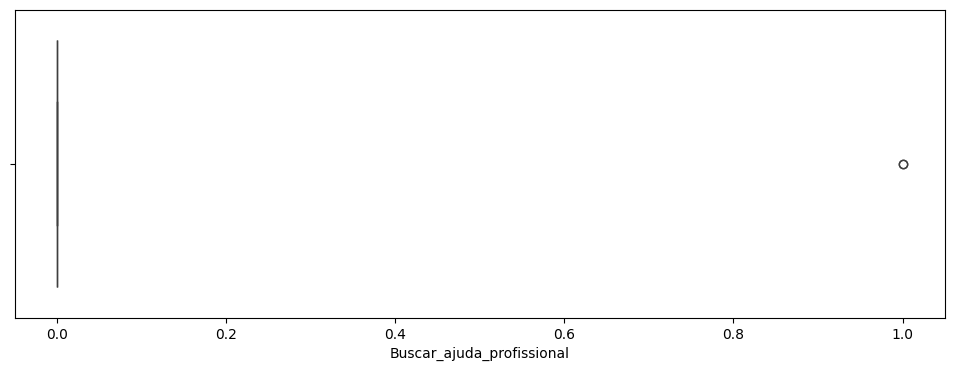

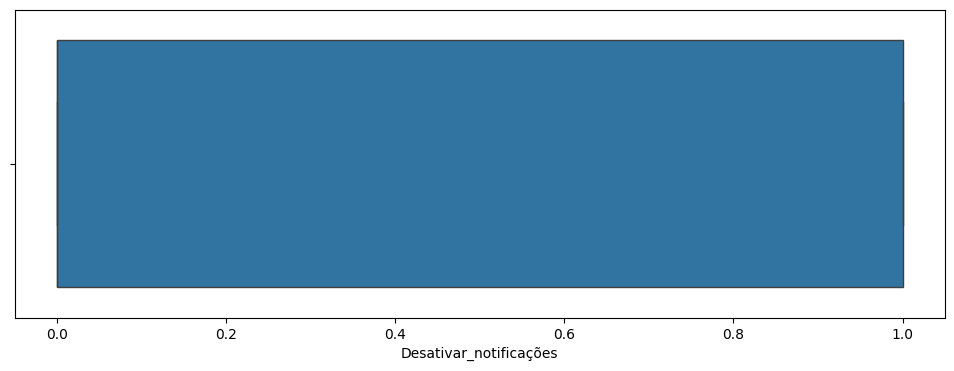

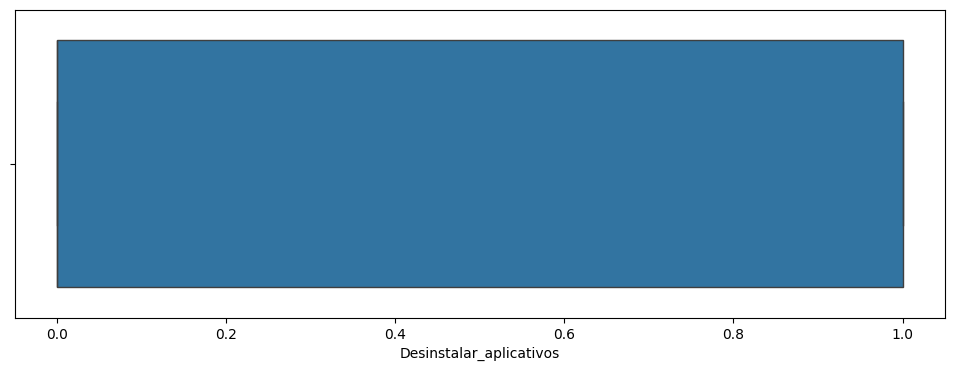

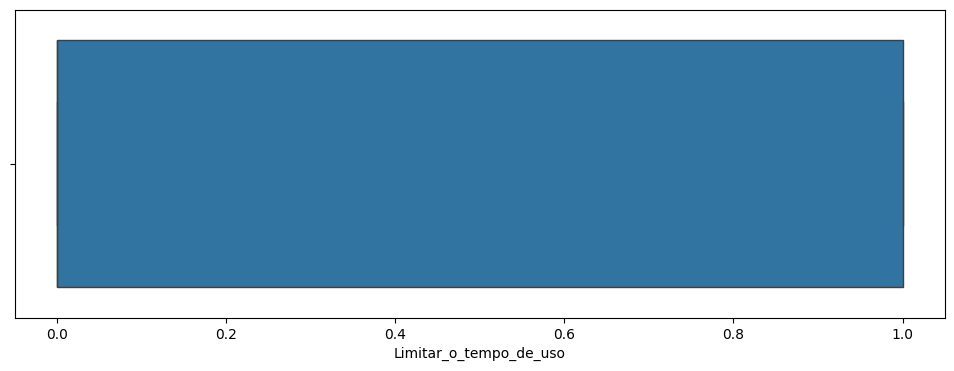

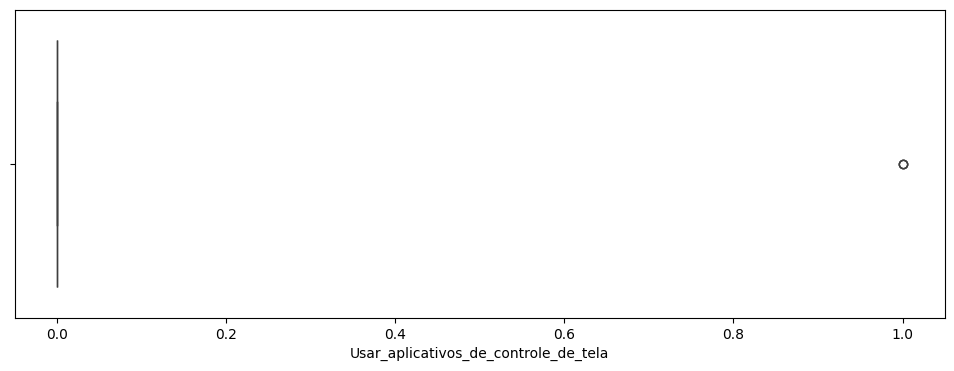

In [39]:
for coluna in dados_featutes_train.columns:
    plota_boxplot(dados_featutes_train[coluna])